# The Smith Parasite Project <img align='right' width='120' height='150' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Machine Learning__</font><br>

> Group composed by:
>> __Ana Carolina Ottavi, nº20220541__ <p>
>> __Carolina Bezerra, nº20220392__ <p>
>> __Daniel Franco, nº20210719__ <p>
>> __Rafael Dinis, nº20221643__ <p>
>> __Tomas Vicente, nº20221355__ <p>
    
***

## 📖 Introduction
    
Within the scope of __Machine Learning__, it was proposed a project, where the students' ability to __build a Predictive  model__ in accordance with a specific challenge would be tested. The problem consists on an ilness called __Smith Parasite__ , a diesease recently discovered by Dr. Smith in England, that has already infected __more than 5000 people, with no apparent connection between them.__
    
__The most common symptoms include fever and tiredness, but some infected people are asymptomatic__. Regardless, this virus is being associated with post-disease conditions such as loss of speech, confusion, chest pain and shortness of breath.

__The conditions of the transmission of the disease are still unknown__ and __there are no certainties of what leads a Patient to suffer or not from it__. Nonetheless, __some groups of people seem more prone to be infected by the parasite than others__.
    
So the challenge, is to build a predictive model that answers the following questions:
    
> * __Who are the groups of individuals more likely to suffer from the Smith Parasite?__ <p>
> * __Can a model predict if a Patient will suffer, or not, from the Smith Disease with high precision?__ <p>
> * __If yes, what are the main drivers for an individual to have the disease?__

The objetive is to analyze and transform the data available as needed and apply different predictive models to answer the main question __if whether a Patient will suffer, or not, from the Smith Disease__ (Disease = 1) or not (Disease = 0). Since the target can only possibly fall into two categories __(Diseased or Not Diseased)__, therefor this is a Classification problem. 
    
__"A classification problem requires that examples be classified into one of two or more classes. A classification can have real-valued or discrete input variables. A problem with two classes is often called a two-class or binary classification problem."__ 
    
Source:<p> 
> * https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
 
__The benchmark the precision of the models, the F1-score will be the indicator considered to determine if the model is predicts correctly.__
The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.
    
***    
### 💾 Data 

The data provided gives __access to a small quantity of sociodemographic, health, and behavioral information obtained from the Patients__. Its divided by sets of training and test data. __The training data will be the one used to build the machine learning models__. In this set, there's also the __ground truth associated to each Patient, i.e., if the Patient has the disease or not__.
The test set will be used __to see how well the model performs on unseen data__, since it provides no access to the __ground truth__.
    
There are available 6 sets of csv files:

>> * __Train & Test Demo - the training and test sets for demographic data and the target__ <p>
>> * __Train & Test Health - the training and test sets for health related data__ <p>
>> * __Train & Test Habits - the training and test sets for habits related data__ <p>
    
<br>
<details open>
    <summary> 
       <font color='SeaGreen' size =3>Click here to SEE/HIDE Feature Description</font>
    </summary><br>
    
### Sociodemographic Data <p>
- __PatientID__ - The unique identifier of the Patient <p>
- __Name__ - The name of the Patient <p>
- __Birth Year__ - Patient Year of Birth <p>
- __Region__ - Patient Living Region <p>
- __Education__ - What is the highest grade or year of school you have? <p>
- __Disease__ - If the Patient has the disease (Disease = 1) or not (Disease = 0) <p>
    
### Habits Related Data <p>
- __Smoking Habit__ - Do you smoke more than 10 cigars daily? <p>
- __Drinking Habit__ - What is your behavior concerning alcohol consumption? <p>
- __Exercise__ - Do you exercise (more than 30 minutes) 3 times per week or more? <p>
- __Fruit Habit__ - How many portions of fruits do you consume per day? <p>
- __Water Habit__ - How much water do you drink per day? <p>
    
### Health Related Data <p>
- __Height__ - Patient’s height <p>
- __Weight__ - Patient’s weight <p>
- __High Cholesterol__ - Cholesterol value <p>
- __Blood Pressure__ - Blood Pressure in rest value <p>
- __Mental Health__ - During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? <p>
- __Physical Health__ - Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?  <p>
- __Checkup__ - How long has it been since you last visited a doctor for a routine Checkup? <p>
- __Diabetes__ - (Ever told) you or your direct relatives have diabetes?

***
### 📋 Index

> #### 1. Data Collection
> #### 2. Data Understanding
>> ##### 2.1 Data Info & Summary Statistics
>> ##### 2.2 Data Quality Verification
> #### 3. Exploratory Data Analysis
>> ##### 3.1 Data Split
>> ##### 3.2 Duplicates
>> ##### 3.3 Missing Values
>> ##### 3.4 Outliers Study
>>> ##### 3.4.1 Manual Approach
>>> ##### 3.4.1 IQR Approach
>> ##### 3.5 Data Exploration
> #### 4. Feature Engineering
>> ##### 4.1 Feature Selection
> #### 5. Modelling & Assessment
>> ##### 5.1 Model Selection
> #### 6. Deployment

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to SEE/HIDE Raw Code"></form>''')

***
## <font color='SeaGreen'> 1. Data Collection </font>
Importing Libraries, __Data Extraction and Merging datasets accordingly to its nature, i.e., if its train or test data.__ <p>

In [1]:
# magic commands
%autosave 90
%matplotlib inline

# libraries
import os
import re
import glob
import time
import warnings 
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from sklearn.svm import SVC
from sklearn import metrics
import scipy.stats as stats
from datetime import datetime
from itertools import compress
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LassoCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from yellowbrick.classifier import ROCAUC
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from skfeature.function.similarity_based import fisher_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import StratifiedKFold , RepeatedKFold, KFold, ShuffleSplit, StratifiedShuffleSplit


# ignoring warnings
warnings.filterwarnings('ignore')

# setting visual theme
sns.set_theme(style = 'white', palette = None)

Autosaving every 90 seconds


In [2]:
current_path = os.getcwd() # current directory (dir)
path = os.path.join(current_path, 'the-smith-parasite-dataset') # joins data folder dir

data_files = glob.glob(path + '/*xlsx') # gets excel files in folder

# creating lists with training an test data
train = []
test = []

for data in data_files: 
    if 'train' in data:
        train.append(pd.read_excel(data)) 
    else: 
        test.append(pd.read_excel(data))

# setting Patient ID as index in all dataframes 
for data_idx in range(len(train)): #
    train[data_idx] = train[data_idx].set_index('PatientID')
    test[data_idx] = test[data_idx].set_index('PatientID')


# merging data with Patient ID as key
train_data = pd.concat(train, axis=1)

test_data = pd.concat(test, axis=1)

# checking data import
print('\033[1mTrain data:')
display(train_data.head(2))

print('\n\n\033[1mTest data:')
display(test_data.head(2))

Train data:


Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   
1805                     0           Not sure   

                                                   Diabetes  \
PatientID                                                     
1167       Neither I nor my immediate family have diabetes.   
1805       Neither I nor my immediate family have diabetes.   

                         Name  Birth_Year      Region  \
PatientID                                               
1167       Mrs. Stephanie Gay        1965      London   
1805         Mr. Sherman Nero        1969  South West   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       High School Incomplete (10th to 11th grade)        1            No   
1805       High School Incomplete (10th to 11th grade)        1            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   

                                Water_Habit  
PatientID                                    
1167       Between one liter and two liters  
1805       Between one liter and two liters



Test data:


Name  Birth_Year                    Region  \
PatientID                                                                
1343         Mr. Ricardo Sherman        1970             East Midlands   
1727       Mr. Jessie Strickland        1966  Yorkshire and the Humber   

                                       Education Smoking_Habit  \
PatientID                                                        
1343        Elementary School (1st to 9th grade)           Yes   
1727       University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1343       I usually consume alcohol every day       No   
1727        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1343       Less than 1. I do not consume fruits every day.   
1727       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1343                     Between one liter and two liters     172      80   
1727       More than half a liter but less than one liter     171      80   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1343                    203             172             20                2   
1727                    225             130             21                0   

            Checkup                                           Diabetes  
PatientID                                                               
1343       Not sure  I have/had pregnancy diabetes or borderline di...  
1727       Not sure                                 I do have diabetes

***
## <font color='SeaGreen'>2. Data Understanding </font>

The Data Description phase __aims to preliminarily understand the structure of the data__, this process will allow the __familiarization with the data, providing the first impressions of patterns, relations, errors and associated changes.__

### 2.1 Data Info &  Summary Statistics

In [3]:
# Checking train data general info in a dataframe
def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    tab_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'}))
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum() / len(data)*100).T.
                             rename(index={0:'Missing values (in %)'}))
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info

display(df_info(train_data).style)

# Checking train and test shapes
print(f'\n\n\033[1mTrain set has {train_data.shape[1]} features with data from {train_data.shape[0]} Patients.\n',
f'\nTest set has {test_data.shape[1]} features (doesn\'t have target) with data from {test_data.shape[0]} Patients.')



Train set has 18 features with data from 800 Patients.
 
Test set has 17 features (doesn't have target) with data from 225 Patients.


__Notes:__

> 1 - There are __800 rows__ (Patients) and __18 training features__ <p>
> 2 - There are __8 quantitative variables__ and __10 qualitative__ <p>
> 3 - __Education__ is the only features with __missing values (1.6 % of total data)__   
* __Sociodemographic__: <p>
> 1 - __Birth Year__ has an __unrealistically low minimum value (1855)__  since the Parasite is recent and the oldest person alive was born in 1907, meaning, it's impossible to have Patients born before that year<p>
>Source:<p> 
>> https://edition.cnn.com/2022/11/12/us/oldest-living-person-115th-birthday-trnd/index.html

* __Health__:<p>
> 1 - Height ranges from __151 cm to 180 cm__<p>
> 2 - Weight ranges from __40kg to 97kg__<p>
> 3 - __High Cholesterol__ and __Blood Pressure__ have strange maximum values<p>
> 4 - __High Cholesterol__ has the highest standard deviation __(possible outliers)__<p>
> 5 - There are __more Patients with the Disease__ than those without (mean slightly higher that .5)<p>

__For qualitative features__:

In [4]:
train_data.describe(include='O').T

count unique                                               top  \
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   

               freq  
Checkup         429  
Diabetes        392  
Name              2  
Region          154  
Education       239  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364

__Notes:__

 * __Sociodemographic__: <p>
> 1 - There are 2 Patients with the __exact same name (possible duplicate)__<p>
> 2 - __Education__ is the only feature __with missing values__<p>
> 3 - Most Patients have __completed University__<p>
> 4 - Most Patients are from __East Midlands__<p>
 * __Habits__: <p>
> 1 - Most Patients __usually consume alcohol every day__<p>
> 2 - Most Patients __don't consume fruits every day__<p>
> 3 - Most Patients __consume between one liter and two liters	every day__<p>
> 4 - Most Patients __don't exercise 3 times per week or more__<p>
> 5 - Most Patients __don't smoke more than 10 cigars daily__ <p>
 * __Health__:<p>
> 1 - Most Patients __don't have nor their immediate family have diabetes__ <p>
> 2 - Most Patients don't visit the doctor for a routine Checkup __in more than 3 years__ <p>

__Questions:__

 * __Do people with lower Education have a higher likelihood of getting the disease?__ <p>
 * __Do people in certain regions (isolated, less populated, less educated...)  have a HIGHER likelihood of getting the disease?__ <p>
 * __Do people who do exercise less often have higher chances of the disease?__<p>
 * __Do smoker have a higher chance of contracting the disease?__<p>
 * __Do people who don't do checkups have a higher chance of getting the disease?__<p>
 * __Do older people have a higher chance to contract the disease?__<p>
 * __Do people with lower Physical Health have a higher chance of getting the disease?__<p>
 * __Do people with healthier Weight tend to not contract the disease?__<p>
 * __Do people who drink more have higher chance to contract the disease?__<p>
 * __Do people who eat more fruit have a higher chance to contract the disease?__<p>

***
## <font color='SeaGreen'>3. Exploratory Data Analysis </font>
Exploratory Data Analysis (EDA) is a __combination of numerical and visualization techniques to summarize data and provide an understanding of the dataset__. EDA should identify: <p>
> * __Variables with a large skew or excess kurtosis (particularly if modelling algorithms assume a normal distribution)__ <p>
> * __Gaps in distributions (bi-modal or multi-modal)__ <p>
> * __Categorical variables with invalid or unexpected values__ <p>
> * __Categorical variables with high cardinality__ <p>
> * __Categorical variables where one level represents most of the observations (imbalanced)__ <p>
> * __Strong correlations with the target variable__ <p>
> * __Redundancy, through strong correlations between training variables__ <p>
> * __Missing values and if there are any patterns per variable?__ <p>
> * __Duplicate rows or multiple rows for the same instance of analysis__ <p>
> * __Outliers. Strange minimum or maximum values__ <p>

After this Data Quality Verification & Cleaning processes, a __Data Exploration__ phase beggins to answer some of the questions raised priorly. Only after, Preprocess procedures will be applied before modelling
 
***
### 3.1 Distributions
> * __Variables with a large skew or excess kurtosis (particularly if modelling algorithms assume a normal distribution)__ <p>
> * __Gaps in distributions (bi-modal or multi-modal)__ <p>

In [5]:
# splitting non-metric (qualitative) from metric (quantitative) features
qualitative = [col for col in train_data.select_dtypes('object').columns]
quantitative = train_data.columns.drop(qualitative).to_list()

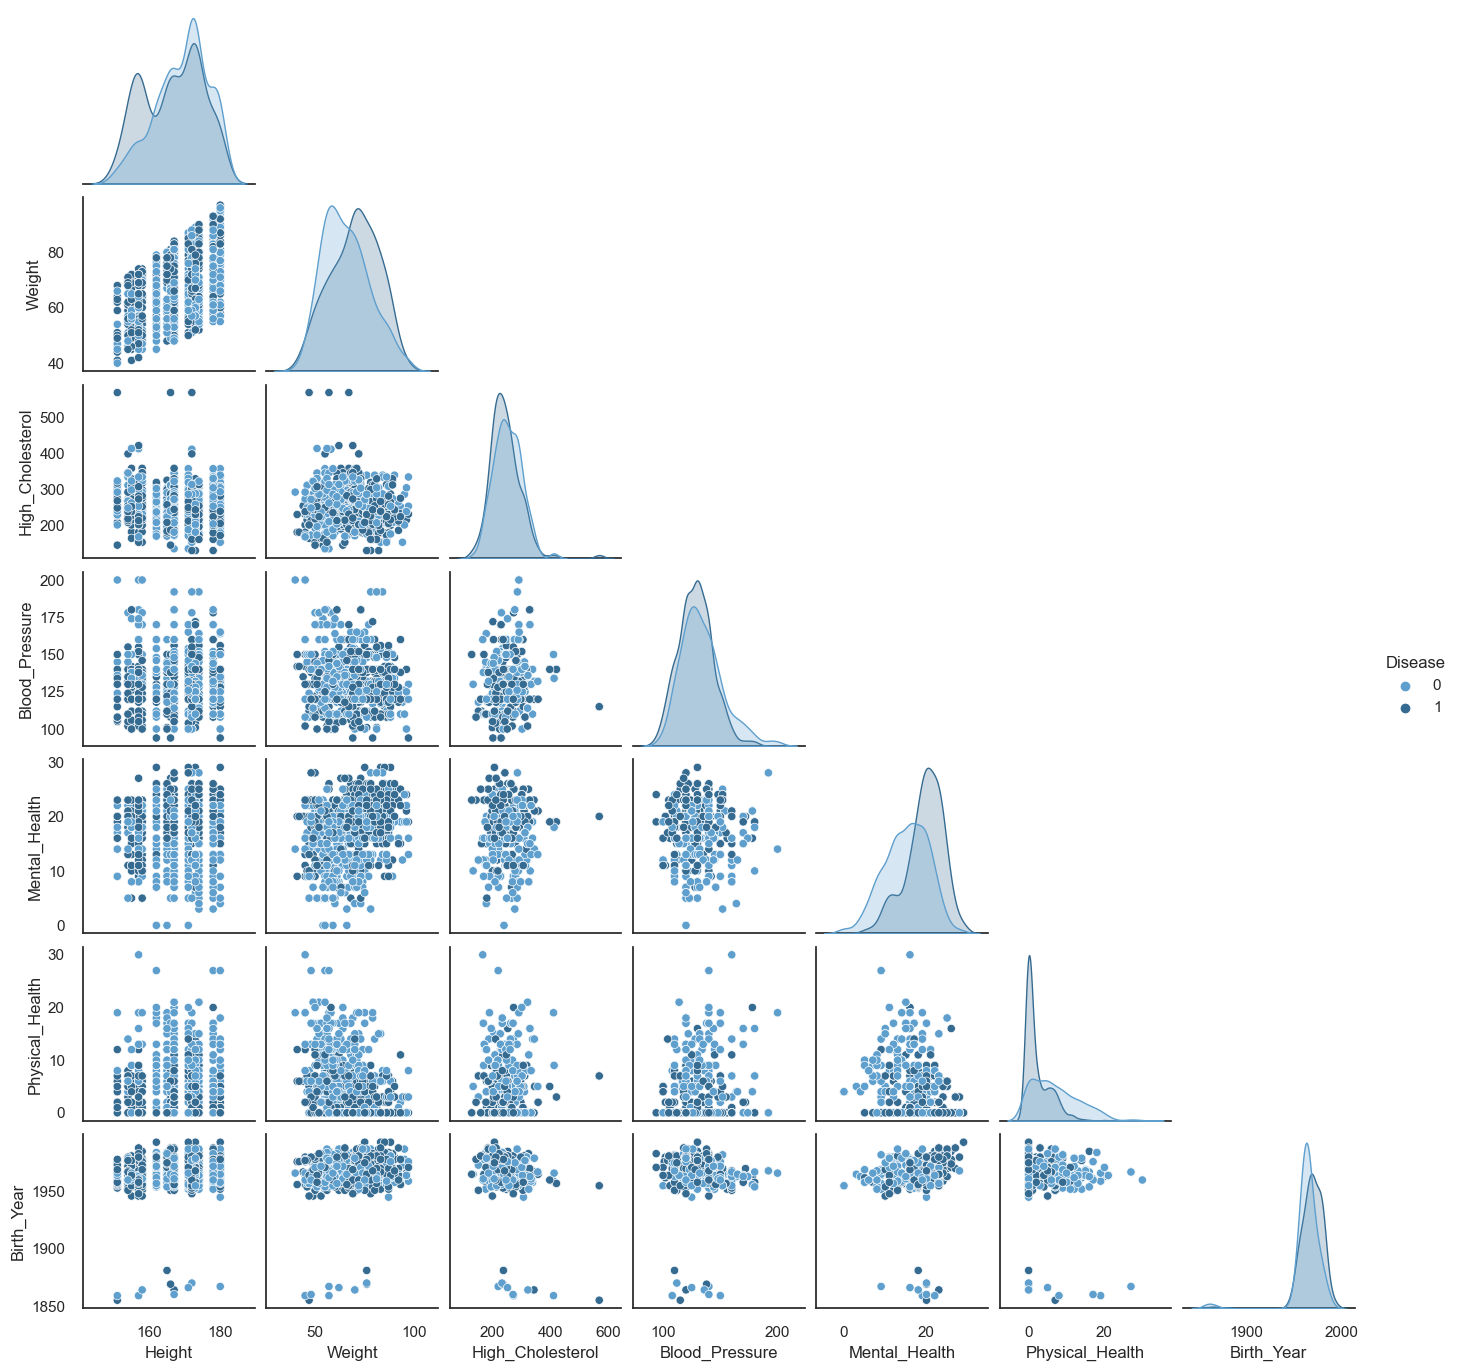

In [6]:
# Layout
plt.rcParams['font.size'] = '15'

# Plot
ax = sns.pairplot(train_data, diag_kind = 'kde', corner = True, hue = 'Disease', palette='Blues_d', height = 2)

plt.show()

__Notes:__ 

> 1 - This pair plot builds on two basic figures, the kdeplot and the scatter plot. The main-diagonal subplots (kdeplots) are univariate Kernel Distribution Estimation Plots for each attribute. This type of plot allows to estimate the probability density function of the continuous or non-parametric variables <p>
> 2 - On the other half, the scatter plots show the relationship or lack of it between two variables, i.e., the right-most plot on the last row shows the scatter plot of __Birth Year__ versus __Physical Health__ <p>
> 3 - Correlation is not assessed only by looking at a scatterplot, but looking at the pairplot above can provide some insights <p>
> 4 - It can be already concluded that Diseased People (the darkest dots, according to the legend on the right) have 
the lower __Physical Health__ values despite having the higher __Mental Health__ values. As for the rest of the features, __they don't present big discrepancies, when comparing Diseased Patients to Non-Diseased__

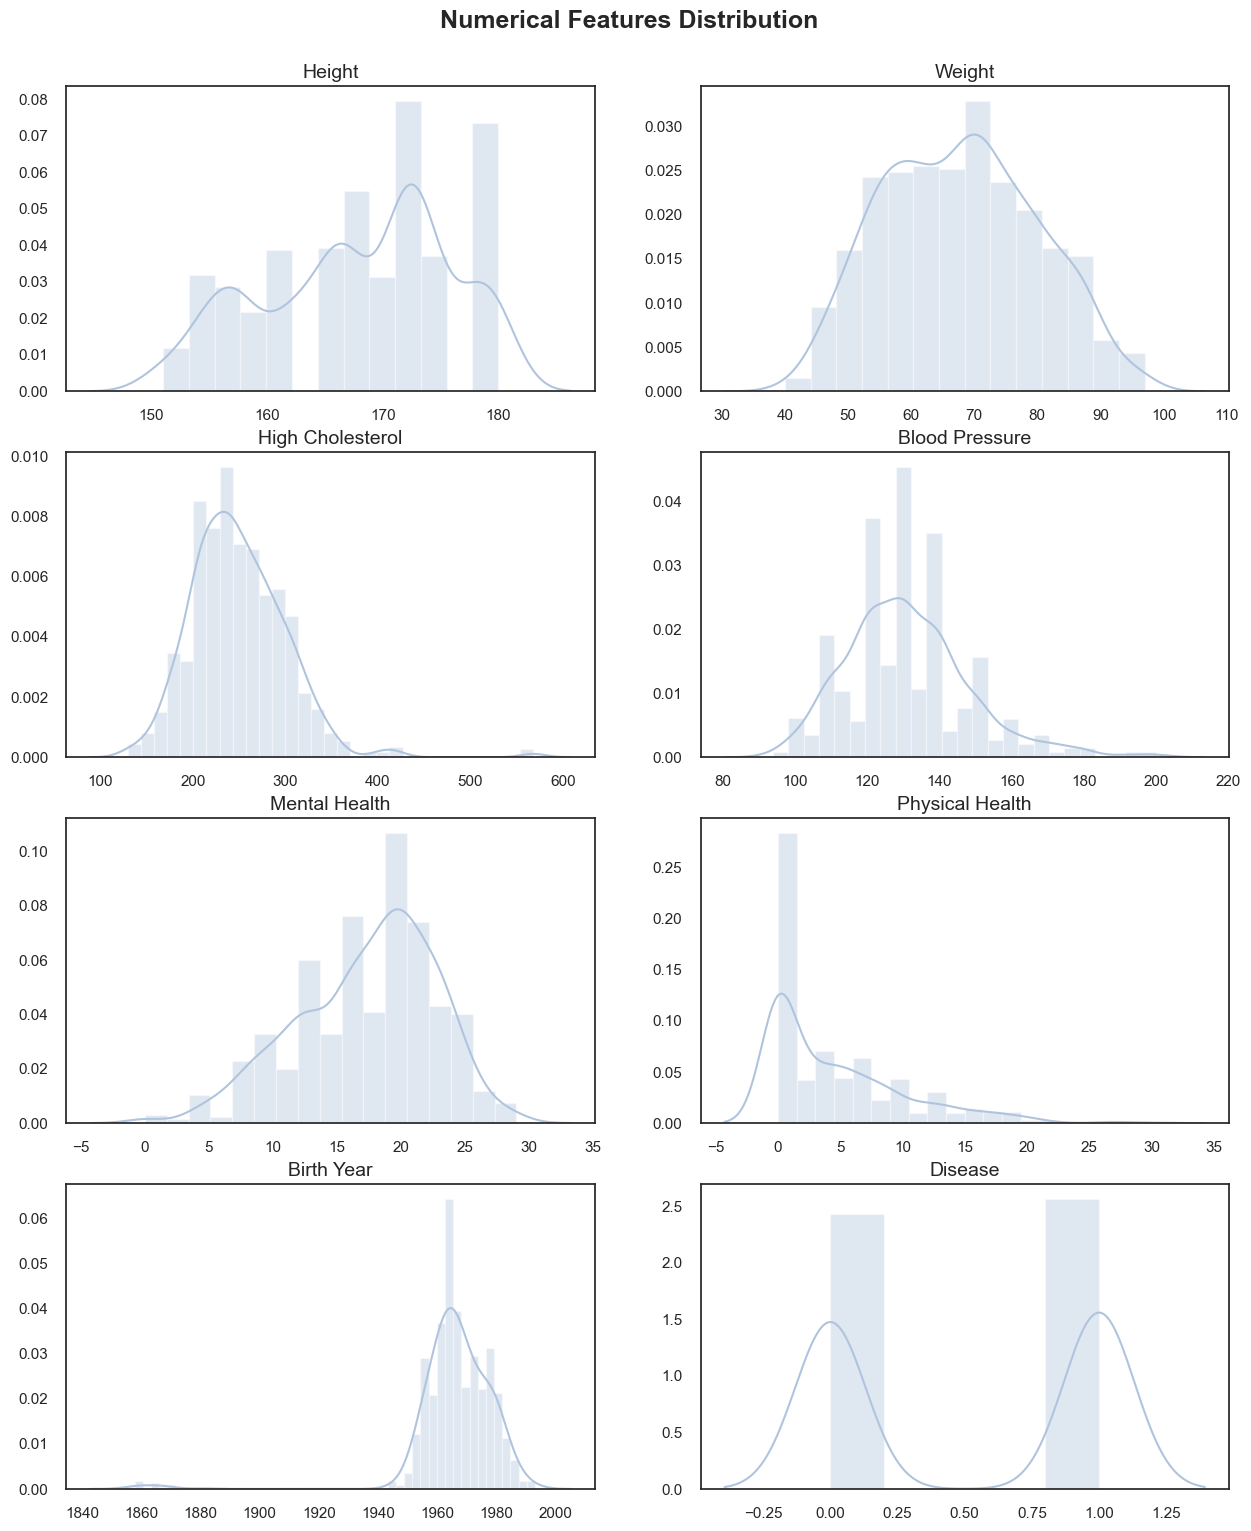

In [7]:
def dist_check(data): 
    '''
    Displays distribution of numerical data
    
    Args:
        data (pandas dataframe) - dataset to check
        
    Returns:
        matplotlib.pyplot subplots
    '''
    # Getting numerical features 
    nums = [col for col in data.select_dtypes(np.number).columns]
    # Plot
    fig, axes = plt.subplots(nrows = 4,
                             ncols = ceil(len(nums)/4),
                             figsize = (15,17), 
                             constrained_layout = True
                            )

    # Plot data
    # Iterating across axes objects and associating each histogram
    for ax, col in zip(axes.flatten(), nums):
        sns.distplot(data[col], hist=True, color = 'lightsteelblue', ax=ax)
        ax.set_title(col.replace('_', ' '), y = 1, fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Layout
    plt.suptitle('Numerical Features Distribution', fontsize = 18, fontweight = 'bold')
    plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = None, hspace = None) 

    plt.show()
    
# checking distributions
dist_check(train_data)

__Notes:__ 

> 1 - __High Cholesterol__, __Blood Pressure__ and __Physical Health__ are positively skewed (possible high value outliers)<p>
> 2 - __Birth Year__ is negatively skewed (low value outliers)<p>
> 3 - __Weight__, __High Cholesterol__, __Blood Pressure__, __Mental Health__ and __Birt Year__, all follow a normal distribuiton despite __Birth Year__ being negatively skewed and __Blood Pressure__ being slightly positively skewed<p> 
> 4 - Through __Birth Year__, it's observed that the majority of the population was born between 1950 and 1980 <p>
> 5 - Through __Disease__, it's confirmed that there are slightly more Patients with the disease than without, but since the categories proportion is almost 50/50, it can be considered a balanced set <p>
> 6 - Through __High Cholesterol__, it's observed that the majority of the population indeed has high cholesterol, with most values falling within the range between 200 and 300 <p>
> 7 - Through __Blood Pressure__, it's observed that there are some high values skewing the data positively. Theoretically, low blood pressure is considered to be 90mmHg (systolical) or lower and high blood pressure is considered to be 140mmHg (systolical) or higher <p>
> 8 - __Mental and Physical Health__ values range from 0 to 30 <p>
> 9 - __Height__ is in centimeters and __Weight__ in kilograms

***
### 3.2 Qualitative Check
> * __Categorical variables with invalid or unexpected values__ <p>
> * __Categorical variables with high cardinality__ <p>
> * __Categorical variables where one level represents most of the observations (imbalanced)__ <p>

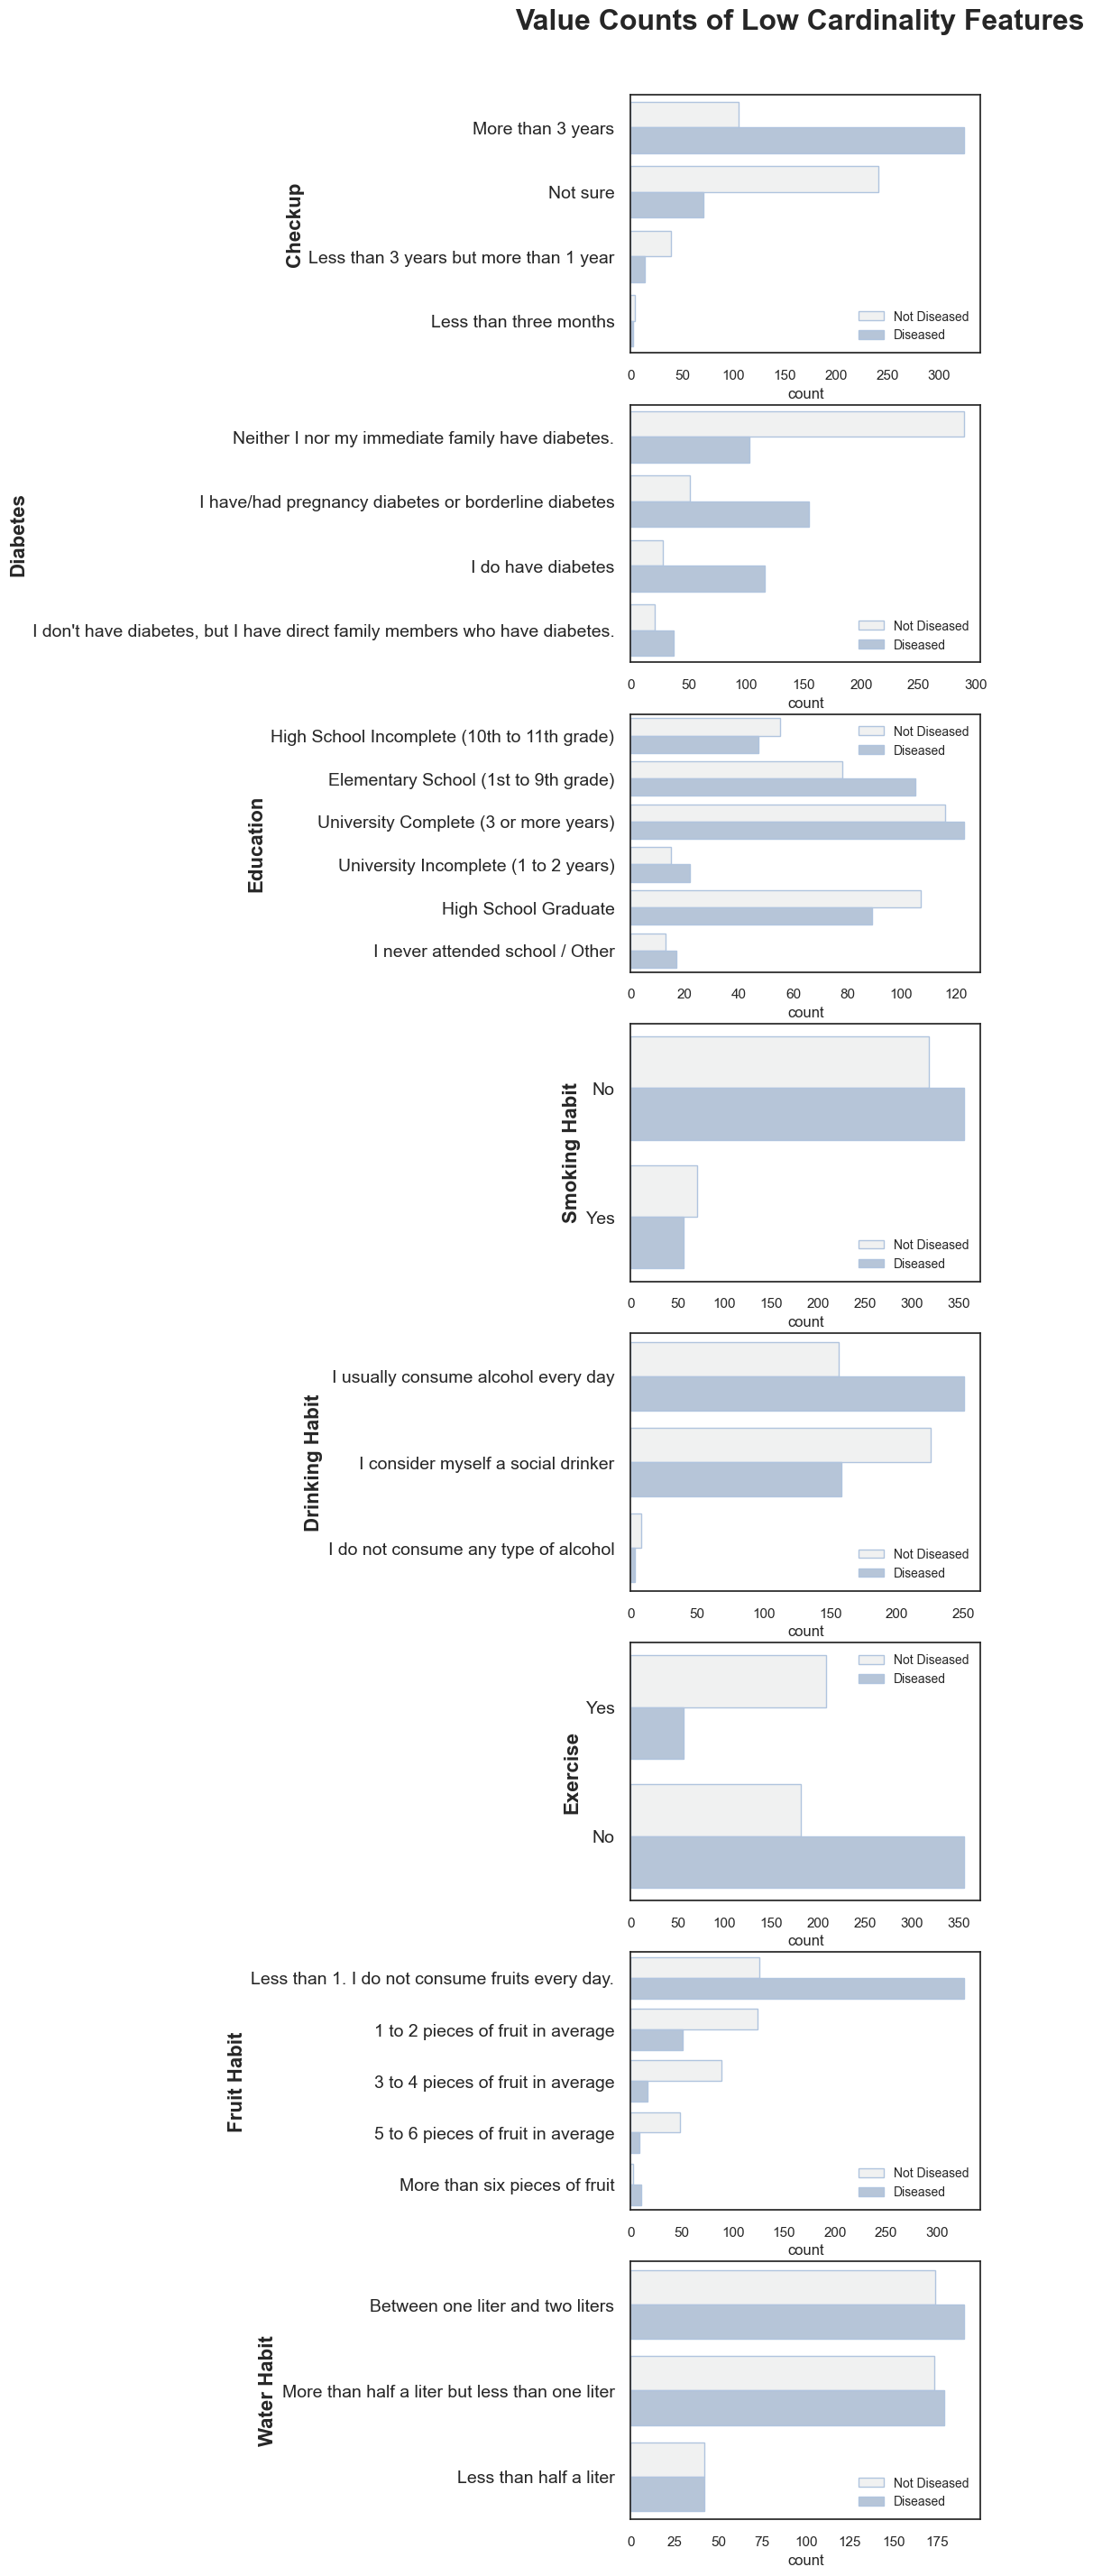

In [8]:
# Getting low cardinality features (bellow 7 different/unique categories)
low_card_cat = [col for col, rows in train_data[qualitative].items() if len(rows.value_counts()) <= 7]

# Plot
fig, ax = plt.subplots(len(low_card_cat), 1, figsize = (5, len(low_card_cat)*4)) 

for i in range(len(low_card_cat)): 
    sns.countplot(data = train_data,
                  y = train_data[low_card_cat[i]],
                  hue='Disease',
                  color='lightsteelblue',
                  edgecolor='lightsteelblue',
                  ax = ax[i])
    # Customize
    if i == 0:
        ax[i].legend(title='', loc='lower right', labels=['Not Diseased','Diseased'],  prop={'size': 10})
    else:
        ax[i].legend(title='', loc=0, labels=['Not Diseased','Diseased'],  prop={'size': 10})
    ax[i].set_ylabel(low_card_cat[i].replace('_', ' '), fontsize=16, fontweight='bold')
    ax[i].tick_params(axis='y', labelsize=14)

    
# Layout
plt.suptitle('Value Counts of Low Cardinality Features', fontsize = 23, fontweight = 'bold')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.4, hspace=None) 

plt.show()

__Notes:__ 
    
> 1 - Some of the habits seem to be important indicators, since it was found that __Patients who consume alcohol every day, don't exercise 3 times per week or more or don't consume fruit everyday__ have higher chances of having the disease<p>
> 2 - Also some health features apper to be important indicators, as it was found that __Patients who don't visit the doctor for a routine Checkup in more than 3 years__ have higher chances of having the disease<p>
> 3 - __Patients who got contact with Diabetes directly (by having it) or indirectly (direct family having it), seem more prone to have the disease, the creation of a dummy variable with Patients who don't have any contact at all with Diabetes (as 0) and Patients who've had any contact (direct or indirect) should be studied__ <p>
> 4 - __Education__, __Water Habit__ and __Smoking Habit__ seem to have __no particular relation with disease__

* __Value Counts of High Cardinality features__:

In [9]:
# getting high cardinality features
high_card_cat = [feat for feat in qualitative if feat not in low_card_cat]

for feat in high_card_cat:
    print(f'\033[1mFeature: {feat}\n')
    print(train_data[feat].value_counts(), '\n\n')

Feature: Name

Mr. Gary Miller           2
Mrs. Stephanie Gay        1
Mr. Roger Rudd            1
Mr. Vito Ertz             1
Mrs. Marilyn Miller       1
                         ..
Mr. Dennis Chatcho        1
Mrs. Shirley Thomas       1
Mr. Martin Paine          1
Mr. Tommy Tricomi         1
Mr. Freddie Vermillion    1
Name: Name, Length: 799, dtype: int64 


Feature: Region

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64 




__Notes:__

> 1 - __Name__ it's an almost unique variable, having just one name common among two of the Patients (might even be a duplicate row), because of this characteristics, __it can be assumed it has no relation with disease__<p>
> 2 - __Region__ has a category on caps "LONDON" with only 5 instances while there's also a category  "London", leading to a conclusion that __these 5 observations were a typo error__<p>

In [10]:
# fixing region feature by lower casing all values
train_data['Region'] = train_data['Region'].str.lower()
test_data['Region'] = test_data['Region'].str.lower()

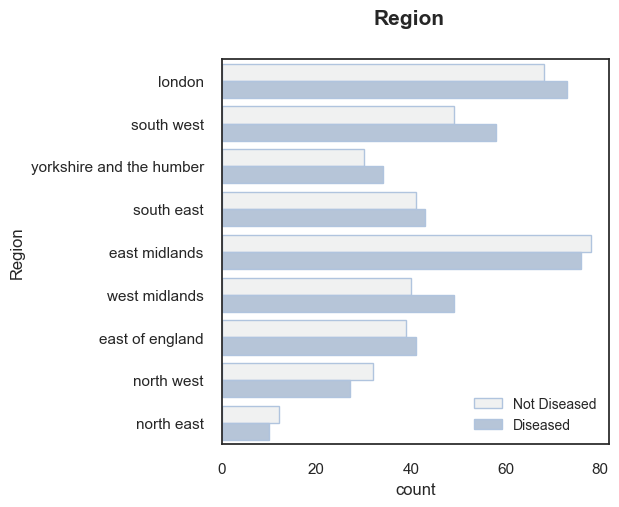

In [11]:
# Plot
plt.figure(figsize=(5,5))

sns.countplot(
                data = train_data,
                y = train_data['Region'],
                hue='Disease',
                color='lightsteelblue',
                edgecolor='lightsteelblue'
             )
# Layout
plt.suptitle('Region', fontsize = 15, fontweight = 'bold') 

# Customize
plt.legend(title='', loc='lower right', labels=['Not Diseased','Diseased'],  prop={'size': 10})

plt.show()

__Notes:__
> 1 - __Region__ seem to have __no particular relation with disease__<p>

***    
### 3.3 Redundancy
> * __Strong correlations with the target variable__ <p>
> * __Redundancy, through strong correlations between training variables__ <p>
    
The __Pearson correlation__ follows some assumptions like: <p>
>    1 - __Data variables are on an interval or ratio level of measurement__ <p>
>    2 - __Data variables follow normal distribution__ <p>
>    3 - __Data has no outliers__<p>
    
Since the data doesn't meet assumptions 2 and 3, it'll not be used<p> 
The __Spearman correlation__ follows an assumption: <p>
>    1 - __Data variables are monotonically related__ (meaning that the relationship between variables fall within the following 2 possibilities: (1) as the the value of one variable increases, so does the value of the other variable, OR, (2) as the value of one variable increases, the other variable value decreases) <p>

Because the data meet this assumption, the __Spearman correlation__ test will be one used<p>

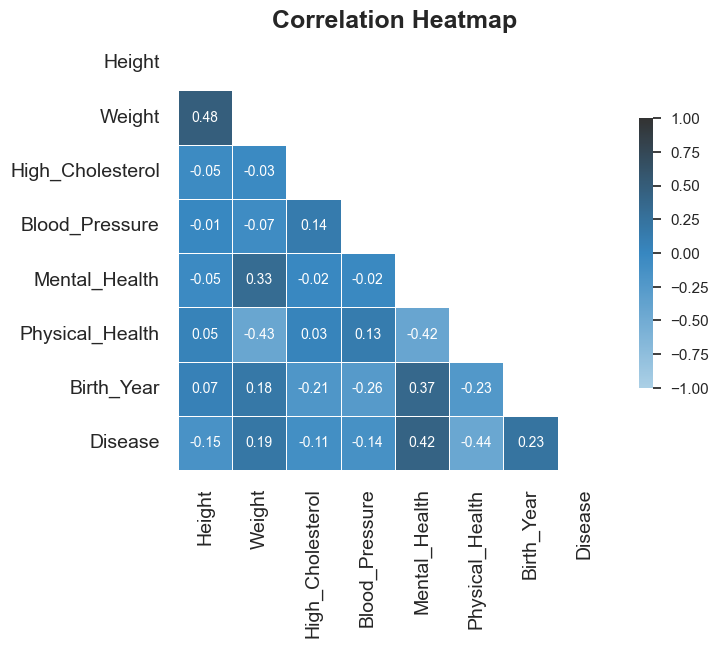

In [12]:
# Correlations analysis
# plot
cmap = sns.color_palette('Blues_d', as_cmap=True)

# Computing the correlation matrix
corr = train_data.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize = (7, 7))


sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidths = .5,
            cbar_kws = {'shrink': .5},
            annot = True,
            fmt = '.2f',
            annot_kws={'size':10}
           )

#customize
plt.title('Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

__Notes:__

> 1 - It seems that the values are __not strongly related__ among each other, which means __there are not redundant variables at this point__<p>
> 2 - __Weight__ and __Height__ have a __moderate positive relationship__ (meaning when the value of one increases, so does the value of the other variable)<p>
> 3 - __Disease__ and __Mental Health__ have a __moderate positive relationship__<p>    

***    
### 3.4 Duplicates

In [13]:
# Checking for any duplicates 
train_duplicate = train_data.reset_index().duplicated().sum()
test_duplicate = test_data.reset_index().duplicated().sum()

print('Number of duplicates in train data:', train_duplicate, '\nNumber of duplicates in test data:', test_duplicate)

Number of duplicates in train data: 0 
Number of duplicates in test data: 0


__Notes:__ 
> 1 - __The repeated name isn't a duplicated Patient__

***    
### 3.5 Outliers

> ### 3.5.1 Z-Score Approach

__Z-score is a statistical measure that reveals how far is a data point from the rest of the dataset__. In other words, Z-score shows how many standard deviations away a given observation is from the mean, denoted by __z__ and is calculated using the following formula: 
<p><p><p>$$\Large{{z}} = \frac{{(x-\overline{x})}}{s}$$
    
Z-score assumes the distribution of the data is normal, therefore only features with this characteristic will be analyzed with this test
    
There are some rules for the threshold used to consider a value an outlier, in this case, it'll the threshold will be 3.5 according to __the rule of thumb__ (which is to use 2, 2.5, 3 or 3.5 as threshold), meaning that __values that are 3.5 standard deviations far from the mean (extreme outliers), are considered outliers by this test__

In [14]:
# features with normal distribution
normal = ['Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Birth_Year']

# Array with Z-scores from all observations of numerical features
Z = np.abs(stats.zscore(train_data[normal]))

# Defining Z-score threshold accordind to the rule of thumb
threshold = 3.5 # the rule of thumb implies the use of 2, 2.5, 3 or 3.5 as threshold

# 2 arrays with the outliers respective row and column indices
positions = np.where(Z >= threshold) # gets values that are 3.5 standard deviation far from the mean
print('\033[1mOutlier Position Arrays:\033[0m\n\nRows:\n', positions[0], '\n\nColumns:\n', positions[1], '\n\n')

# High Z-score values count
columns = positions[1]

for col in np.unique(columns): 
    # getting column name & replacing underscore with space
    col_name = train_data[normal].columns[col].replace('_', ' ') 
    occurrences = np.count_nonzero(columns == col) # getting number of outliers per column
    print(f'The \033[1m{col_name}\033[0m feature has {occurrences} observations with a Z-score',
          f'higher or equal to {threshold}\n') 

Outlier Position Arrays:

Rows:
 [ 18  22  35  61  93 198 312 312 493 503 566 585 593 617 640 648 705 710
 729 761 797] 

Columns:
 [4 1 2 4 4 4 1 4 4 2 4 2 4 2 4 4 4 2 1 2 4] 


The High Cholesterol feature has 3 observations with a Z-score higher or equal to 3.5

The Blood Pressure feature has 6 observations with a Z-score higher or equal to 3.5

The Birth Year feature has 12 observations with a Z-score higher or equal to 3.5



### Z-Score Outlier Values

In [15]:
def check_zscore_outliers(data, col):
    '''Checks values that Z-score test consider as outliers
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        
    Returns: 
        Print with outliers and respective index
    '''
    col_name = col.replace('_', ' ') # gets column name and replaces underscore with space
    tmp = data[col].reset_index() # reseting index because Z-score returns row position array with zero-based indexing
    
    # Z-scores from all observations in numerical features
    Z = np.abs(stats.zscore(tmp.drop(tmp.columns[0], axis=1))) # dropping Index column
    threshold = 3.5 # setting threshold according to thumb rule
    positions = np.where(Z >= threshold) # positions of identified outliers

    # Checking column range vs. outliers
    mini = data[col].min() 
    maxi = data[col].max() 
    print(f'The {col_name} feature ranges from {mini} to {maxi}\n\nOutlier values:\n')
    for row in positions[0]:
        print(f'Value from row {row}: ', tmp[col][row].round(2))
        
for col in np.unique(columns): 
    check_zscore_outliers(train_data, train_data[normal].columns[col])
    print('\n')

print('If we eliminate outliers with the Z-Score Method it\'ll remain\033[1m',
      np.round((1-len(set(positions[0]))/len(train_data))*100,3),'%\033[0m of the initial data')

The High Cholesterol feature ranges from 130 to 568

Outlier values:

Value from row 22:  568
Value from row 312:  568
Value from row 729:  568


The Blood Pressure feature ranges from 94 to 200

Outlier values:

Value from row 35:  200
Value from row 503:  200
Value from row 585:  192
Value from row 617:  192
Value from row 710:  192
Value from row 761:  200


The Birth Year feature ranges from 1855 to 1993

Outlier values:

Value from row 18:  1859
Value from row 61:  1859
Value from row 93:  1864
Value from row 198:  1881
Value from row 312:  1855
Value from row 493:  1859
Value from row 566:  1867
Value from row 593:  1869
Value from row 640:  1870
Value from row 648:  1866
Value from row 705:  1864
Value from row 797:  1860


If we eliminate outliers with the Z-Score Method it'll remain 97.5 % of the initial data


> ### 3.5.1 IQR Approach

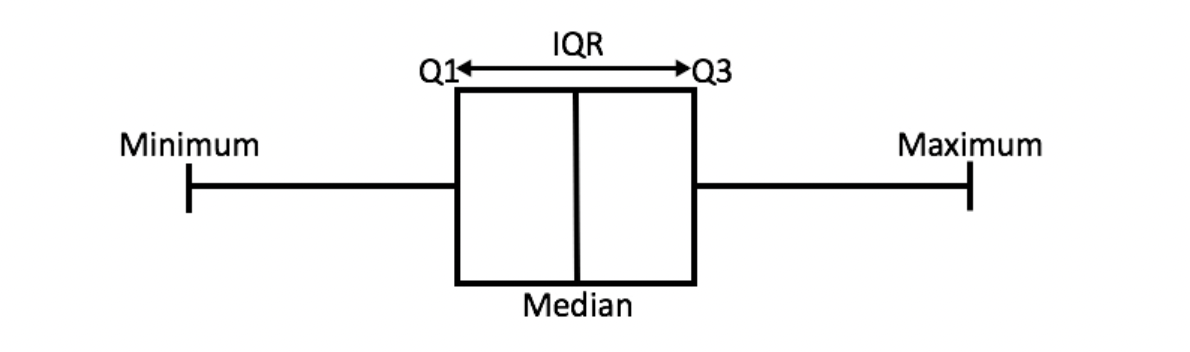

A boxplot tells, more or less, about the distribution of the data. __It gives a sense of how on how much the data is spread about, what’s its range and about its skewness__ <p><p>
> * A boxplot shows:
    >> * __The minimum value__ <p>
    >> * __The first quartile (Q1), i.e., to say 25% of the data lies between minimum and Q1__ <p>
    >> * __The median, also called Q2 of the data (resulting from the fact that the data is ordered)__ <p>
    >> * __The Q3, i.e., to say 75% of the data lies between minimum and Q3__ <p>
    >> * __The maximum value__ 
The __difference between Q3 and Q1 is called the Inter-Quartile Range__ or IQR <p><p>
    
To detect the outliers using this method, a new range is defined (decision range), where __any data point lying outside this range is considered as an outlier and is accordingly dealt with__. The range is as given below: <p>
> * __Lower Bound: (Q1 - criterion * IQR)__<p>
> * __Upper Bound: (Q3 + criterion * IQR)__<p>
        
So any data point lower than the Lower Bound or higher than the Upper Bound __is considered as an outlier by this method__

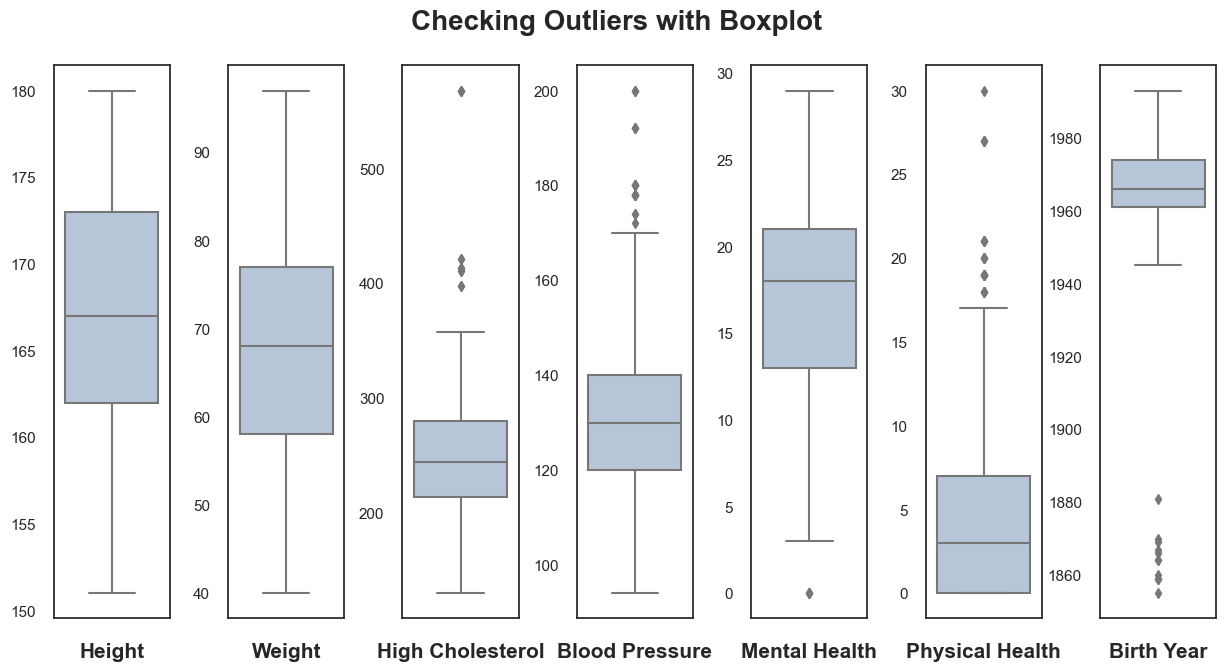

In [16]:
# Getting numerical data into a dataframe
tmp = train_data[quantitative].copy()

# Getting high variance numerical data
for col, rows in tmp.items(): 
    if rows.value_counts().shape[0] == 2:
        del tmp[col]
        
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = len(quantitative)-1,
                       figsize = (15, 7),
                       #constrained_layout=True
                      ) 
        
for row in range(tmp.shape[1]):
    sns.boxplot(y = tmp.iloc[:,row], color = 'lightsteelblue', ax = ax[row])
    ax[row].set_xlabel(tmp.columns[row].replace('_',' '), fontsize = 15, fontweight = 'bold')
    ax[row].set_ylabel('')
    
# Layout
plt.suptitle('Checking Outliers with Boxplot', fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=.90, wspace=.5, hspace=None) 
        
plt.show()

__Notes:__
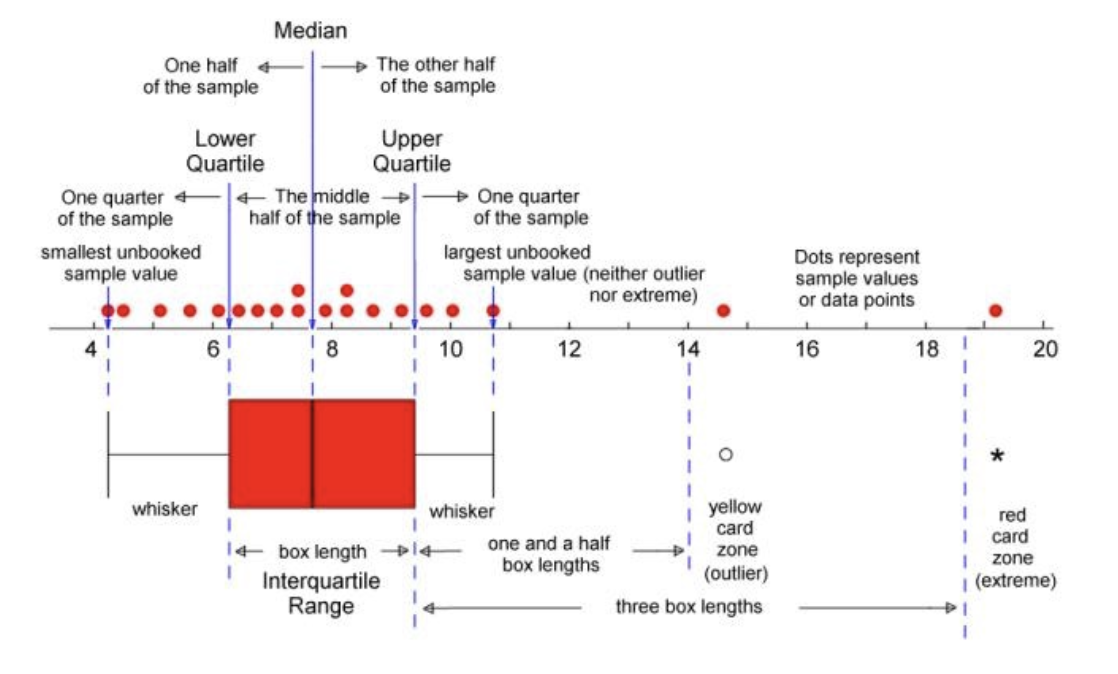
> * The python boxplot uses a criterion of 1.5, meaning that, __values 1.5 times bellow than Q1 and 1.5 times above Q3 are consider outliers__ <p>
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__ <p>
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier https://bolt.mph.ufl.edu/6050-6052/unit-1/one-quantitative-variable-introduction/understanding-outliers/#extreme

In [17]:
def check_IQR_outliers(data, criterion, mode='data'):
    '''
    Detects outliers by generating a decision range based on a criterion (threshold) 
    and locating values that don't fall within this range. 
    Can return the dataframe without the outliers or the percentage of remaining data
    after outlier removal or the values considered as outliers for each column by 
    changing the parameter 'mode' (data as default)
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        criterion (int) : IQR multiplier, the higher, the larger the decision range
        mode (str): 'data' to get dataframe without outliers 'perc' to check percentage
                     or 'values' to check values
        
    Returns:
        Dataframe without 
        Print with percentage of remaining data after removing outliers or
        index and values that fall outside the decision range (outliers)
    '''
    if mode == 'data': 
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, 0)]
        
        return outliers
        
    elif mode == 'perc':
        print('\n\033[1mPercentage of remaining data after outlier removal with IQR method:\033[0m\n')
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            #outliers.append(data[col].between(lower_lim[col], upper_lim[col], inclusive='both'))
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, axis=0)]
        
        print(f'\033[1m{round(len(outliers)/len(data)*100,3)} %\033[0m of remaining data', 
              'after IQR method outlier removal, when criterion is', criterion)
    
    else:
        print('\n\n\033[1mOutlier Values:\033[0m\n')
        for col in data.select_dtypes(np.number).columns:
            Q1 = data[col].quantile(.25) # value of first quartile
            Q3 = data[col].quantile(.75) # value of third quartile
            IQR = Q3 - Q1 # interquartile range
            lower_lim = Q1 - criterion * IQR # setting min limit
            upper_lim = Q3 + criterion * IQR # setting max limit
            outliers = data.loc[(data[col] > upper_lim) | (data[col] < lower_lim)][col]
            print(f'Outlier values in \033[1m{col}\033[0m:\n')
            for idx, val in outliers.items():
                print(f'Value from Client {idx}: \033[1m', round(val,2),'\033[0m\n')

# checking outlier values
check_IQR_outliers(data=train_data, criterion=3, mode='value')


# checking percentage of remaining data
check_IQR_outliers(data=train_data, criterion=3, mode='perc')



Outlier Values:

Outlier values in Height:

Outlier values in Weight:

Outlier values in High_Cholesterol:

Value from Client 1464:  568 

Value from Client 1158:  568 

Value from Client 1192:  568 

Outlier values in Blood_Pressure:

Outlier values in Mental_Health:

Outlier values in Physical_Health:

Value from Client 1069:  30 

Outlier values in Birth_Year:

Value from Client 1591:  1859 

Value from Client 1481:  1859 

Value from Client 1288:  1864 

Value from Client 1139:  1881 

Value from Client 1158:  1855 

Value from Client 1593:  1859 

Value from Client 1055:  1867 

Value from Client 1836:  1869 

Value from Client 1803:  1870 

Value from Client 1072:  1866 

Value from Client 1390:  1864 

Value from Client 1088:  1860 

Outlier values in Disease:


Percentage of remaining data after outlier removal with IQR method:

98.125 % of remaining data after IQR method outlier removal, when criterion is 3


***
### 3.5.3 - Manual Approach

With manual outlier removing, __several outliers can be excluded with precision__, since is the user who define manually the conditions to determine which values are outliers, considering the ones who fall under these conditions bellow (__the conditions were defined based on the extreme values observed in the summary statistics and distribution plots, and other Outlier Detection Methods__)<p>
> * __Conditions:__ <p> 
>> * As mentioned previously __Birth Year__ minimum value must 1907, since the oldest living person was born in that year and __this is a recent problem, with recent data, meaning all Patients need to be alive__ <p>
>> * Values of __High Cholesterol__ above 500 seem to extremely high and were detected by the two previous methods, therefore, they'll be considered as ouliers<p> 
<img src="https://i.insider.com/5f19dd2ef0f41940574e24a5?width=1000&format=jpeg&auto=webp" width="500"/><p>
>> * As for __Blood Pressure__ values above 180 mean the Patient should be having a Hipertensive Crysis and were also detected by the Z-Score test, therefore, they'll be considered as ouliers<p>
<img src="https://i0.wp.com/images-prod.healthline.com/hlcmsresource/images/topic_centers/2018-10/9842-blood-pressure-readings-explained-1296x1645-body.20181002181105178.jpg?w=1155&h=3454" width="500" />

In [18]:
# Outlier Conditions
manual_outliers = train_data.loc[
            (train_data['Birth_Year'] < 1907) |
            (train_data['High_Cholesterol'] > 500) |
            (train_data['Blood_Pressure'] > 180)
            ]

# saving dataset without outliers to check results
tmp = train_data.drop(manual_outliers.index)

print('After excluding the outliers manually,',
      f'the dataset will remain with \033[1m{np.round((1-len(manual_outliers)/len(train_data))*100, 3)}',
      '%\033[0m of its original Customers')


After excluding the outliers manually, the dataset will remain with 97.5 % of its original Customers


In [19]:
### TALVEZ NÃO DROPPE BLOOD PRESSURE ALTA (VALIDAR)

*** 
### Outliers Conclusion 

Percentages of Data kept after outlier removal for each test: <p>
> * __Z-Score:__ 97.5 %
> * __IQR:__ 98.1 %
> * __Manual:__ 97.5 %
    
The __IQR__ is the one who keeps more data but doesn't consider the values above 180 in __Blood Pressure__ as ouliers, while the other two tests consider. Also, considers the maximum __Physical Health__ (30) to be an outlier, but that's impossible since it's within the predefined range of the feature [0,30], therefore this will not be method used. The __Z-Score__ test detected the same outliers as the __Manual__ test. Therefore, one of this two methods will be applied to remove outliers
    
### Distribution Plots After Outlier Removal

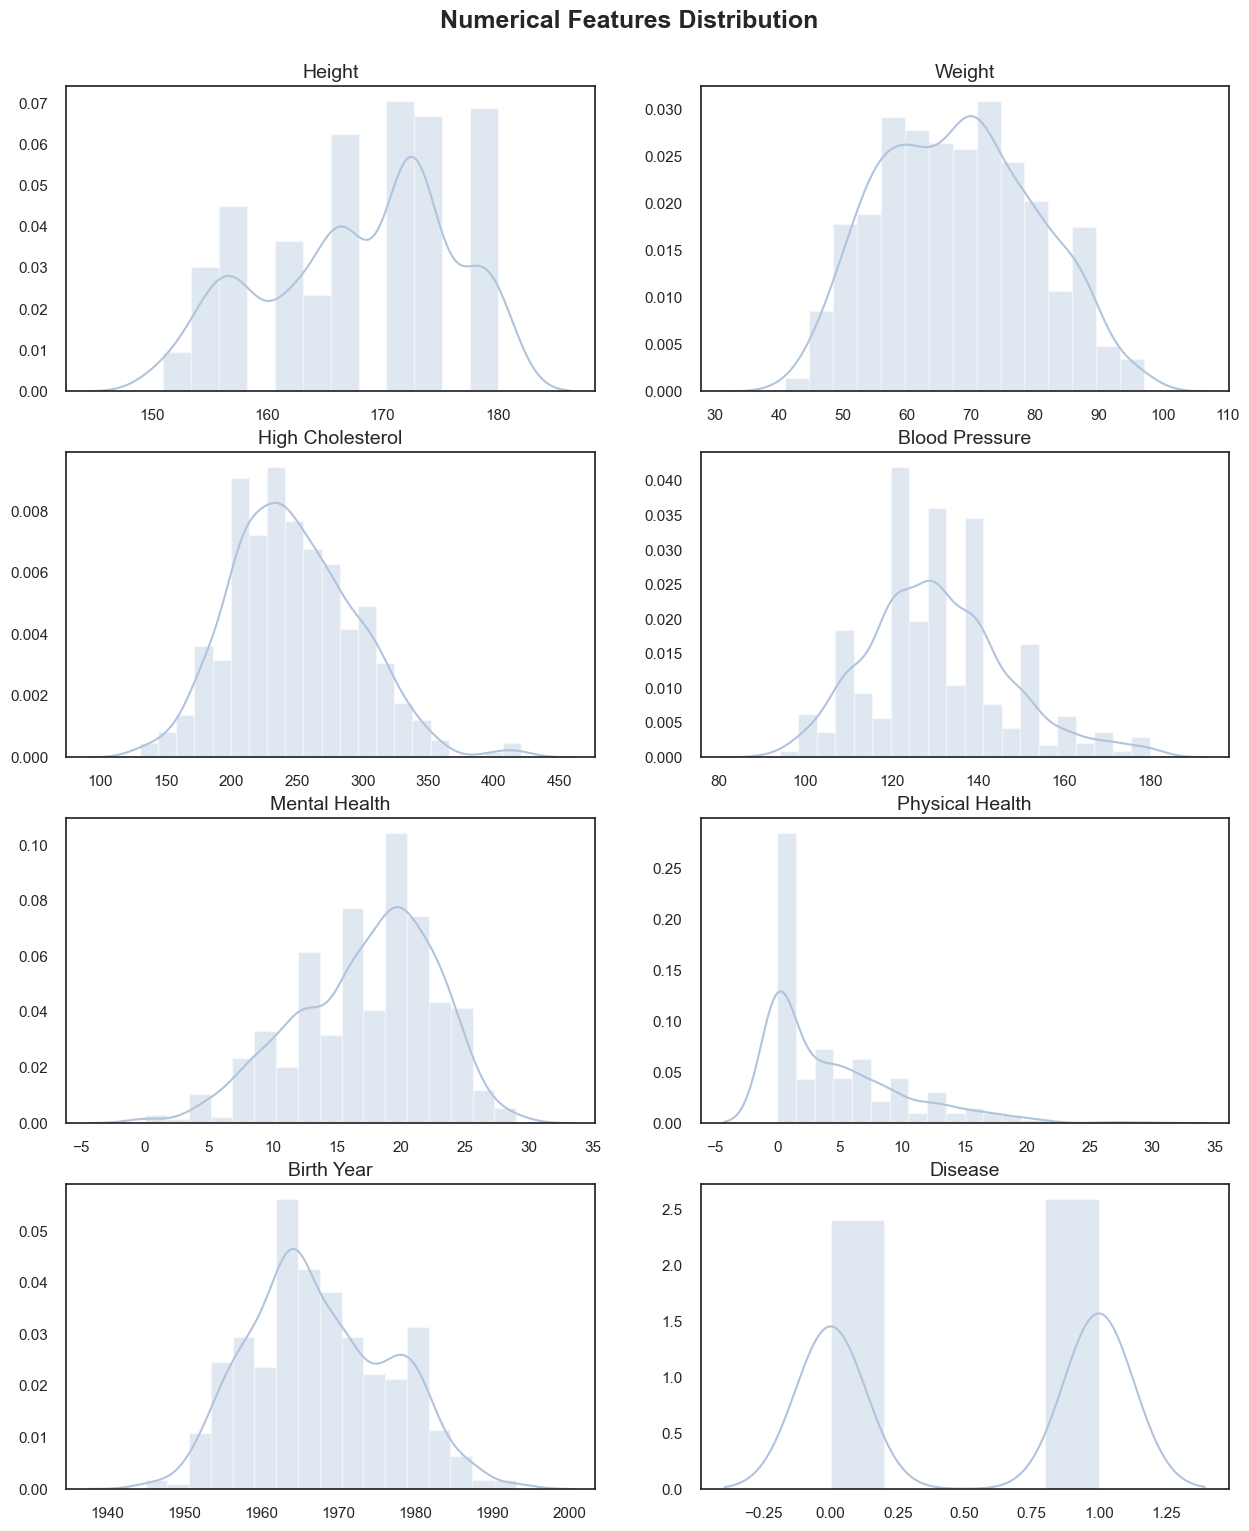

In [20]:
# removing outliers
train_data.drop(manual_outliers.index, inplace = True)

# checking distributions
dist_check(train_data)

***
### 3.4 Data Split
__Data splitting is when data is divided into two or more subsets__. Typically, with a __two-part split__, one part is used to evaluate or test the data and the other to train the model. <p> 
As mentioned previously in the introduction __"The training data will be the one used to build the machine learning models"__, therefore, only the training data will be splitted (__into two new sets, Training and Test__).<p> 
> * __Why split the data now before finishing Data Preparation?__ <p>
>> *   Test data is data from the future, meaning it's __unseen data to the models__, therefore, __all data imputation involving techniques (like mean, median, mode, z-score standarization etc...) have to be done after train-test split__, otherwise might lead into a __Data Leakage issue__ (when the __training data contains information about the target__, but similar data __will not be available when the model is used for prediction__. This lead to high performance on the training set (and possibly even the test data), but the model will perform poorly in production)
    
The split will leave 20% in the hold out sample, __meaning 80% of the Train Data will be used to train models__, also the data will be __randomly shuffled__ before being split and __stratified__, meaning it'll retain the same proportion of classes on train and test sets that are found in the original dataset

In [21]:
# splitting target from other variables
X = train_data.drop('Disease',axis=1)
y = train_data['Disease']

# Setting random states seed
seed = 999

# Splitrin the data, leaving 20% in the hold out sample
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    random_state = seed,
                                                    shuffle = True,
                                                    stratify = y,
                                                    test_size = .2,
                                                   )

print('train: \033[1m{}%\033[0m | test: \033[1m{}%\033[0m'.format(round(len(y_train)/len(y)*100),
                                                                  round(len(y_test)/len(y)*100)
                                                                  ))

train: 80% | test: 20%


***
### 3.5 Missing Values

In [22]:
# replacing strange characters for missing values
strange_values = ['!', '$','%','?','*','+','_','@','€',' ','{']

X_train.replace(strange_values, np.nan, inplace=True)
X_test.replace(strange_values, np.nan, inplace=True)

In [23]:
# Missing values reporter function
def missing_value_reporter(data, threshold=None):
    '''
    Returns pandas dataframe with feature's missing values count in absolute and relative frequency
    after a threshold is parsed (max % of column missing values), so it'll tell if the features are 
    above or bellow the desired missing threshold limit (True for above or False for bellow).
    
    Args:
        data (pandas.dataframe)- input for data
        threshold (float) - input for threshold variable from 0 to 1 
                            if the threshold is not provided, it defaults to None
    Returns: 
        pandas.dataframe
        
    '''
    na_count = data.isna().sum() 
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

# threshold on 5%
print('Missing Values in Train Data:')
display(missing_value_reporter(data = X_train, threshold = .05))
print('\nMissing Values in Test Data:')
display(missing_value_reporter(data = X_test, threshold = .05))

Missing Values in Train Data:


Feature  Nº of missings  % of missings  Above threshold
Education  Education               9           0.01            False


Missing Values in Test Data:


Feature  Nº of missings  % of missings  Above threshold
Education  Education               3           0.02            False

__Notes:__ 

> 1 - To prevent more data loss, it'll be used the __Education__ mode of the Train dataset to fill the missing values

In [24]:
# filling missing values with mode on train and test
X_train.fillna(X_train['Education'].mode()[0], inplace=True)
X_test.fillna(X_train['Education'].mode()[0], inplace=True) 

print('Number of remaining missing values in Train Data after imputation:', X_train.isna().sum().sum(),
     '\nNumber of remaining missing values in Test Data after imputation:', X_test.isna().sum().sum())

Number of remaining missing values in Train Data after imputation: 0 
Number of remaining missing values in Test Data after imputation: 0


***
## <font color='SeaGreen'>4. Data Pre-processing </font>
__Data Pre-processing__ refers to manipulation or dropping of data __before it's used in order to ensure or enhance performance__, this phase will consist on: <p>
> *  __Feature Engineering__ <p>
>> 1. __Feature Creation & Study__ <p>
>> 2. __Feature Selection__ <p>
>> 3. __Categorical Features to Numerical__ <p>
> * __Standardization Study__
***
    
### 4.1 Feature Engineering
> ### 4.1.1 Feature Creation
It'll be created the following columns: <p> 
>> 1 - __Age__ - Increases __Birth Year__ readability <p>
>> 2 - __BMI__ - Body Mass Index is a __person's weight in kilograms (or pounds)__ divided by __the square of height in meters__ (in the data Height is in cm and Weight is in kilograms) <p> 
>> 3 - __Diabetes Contact__ - As mention previously, it'll be created a __binary variable that'll assume the value of 1 if Patients had any type of contact with Diabetes, could be direct (by having it) or indirect (direct family having it) and assume the value of 0 otherwise__ (no contact at all with Diabetes <p>
    
For numerical features the Feature Creation, there will be __redundancy__ among the newly variables and the ones that generated them, so in order to select the features that'll proceed to the modelling it'll be used the __Spearman correlation__ test on the train data (target will be merged to train data on a new python variable just for the sake of this test). __The variable with higher correlation with the target will stay, while others that migh be highly correlated with this feature will be dropped__. The decision made with train data will be also applied to test set

In [25]:
# Age column (increases readability)
X_train['Age'] = datetime.now().year - X_train['Birth_Year']
X_test['Age'] = datetime.now().year - X_test['Birth_Year']
test_data['Age'] = datetime.now().year - test_data['Birth_Year']

# Body mass index column
X_train['BMI'] = np.round(X_train['Weight'] / (X_train['Height'] / 100)**2, 3)
X_test['BMI'] = np.round(X_test['Weight'] / (X_test['Height'] / 100)**2, 3)
test_data['BMI'] = np.round(test_data['Weight'] / (test_data['Height'] / 100)**2, 3)

# Diabetes Contact column
# "Neither I nor my immediate family have diabetes." is the only case where there's no contact, also the most common
no_contact = 'Neither I nor my immediate family have diabetes.'
X_train['Diabetes_Contact'] = X_train['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)
X_test['Diabetes_Contact'] = X_test['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)
test_data['Diabetes_Contact'] = test_data['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)

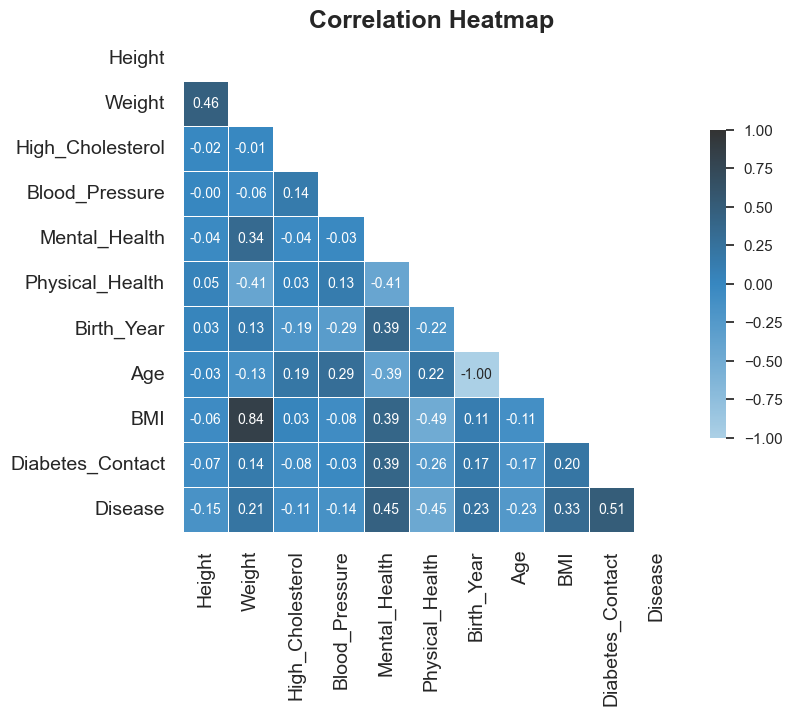

In [26]:
# Correlations analysis
# getting target again for visualization purposes
tmp = X_train.reset_index().merge(y_train.reset_index(), on='PatientID', how='left').set_index('PatientID')
# plot
cmap = sns.color_palette('Blues_d', as_cmap=True)

# Computing the correlation matrix
corr = tmp.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize = (8, 8))


sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidths = .5,
            cbar_kws = {'shrink': .5},
            annot = True,
            fmt = '.2f',
            annot_kws={'size':10}
           )

#customize
plt.title('Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

__Notes:__ 

> 1 - __Diabetes Contact__ is now the highest correlation coefficient with the target, __Disease__ <p>
> 2 - __BMI__ is slightly more correlated with the target than __Weight__, while having an strong relationship between them (since __Weight__ is used to calculate __BMI__), so __Weight__ will be dropped <p>
> 3 - __Age__ and __Birth Year__ are __perfectly collinear__ (their correlation coefficient is +/- 1.0) and __both have the same relationship strength with the target__, just different directions. For better readability of values __Age__ will stay and __Birt Year__ will be dropped

In [27]:
# Dropping redundant features
X_train.drop(['Weight', 'Birth_Year', 'Diabetes'], axis=1, inplace=True)
X_test.drop(['Weight', 'Birth_Year', 'Diabetes'], axis=1, inplace=True)
test_data.drop(['Weight', 'Birth_Year', 'Diabetes'], axis=1, inplace=True)

***
### 4.2 Normalization Study

__Normalization refers to rescaling real-valued numeric attributes into a certain range__. Data normalization is used in machine learning to make model training less sensitive to the scale of features.

__Because variance is dependent on scale, it's a good practice to normalize features before feature selection__

In [28]:
# function to
def addlabels(x,y):
    '''
    Adds value labels to plot 
    
    Args: 
        x (list | series) - values of x-axis
        y (list | series) - values of y-axis
    Returns: 
        Applies labels within a plot
    '''
    for i in range(len(x)):
        plt.text(i, .5, np.round(y[i],3), ha = 'center',
                Bbox = dict(facecolor = 'lightblue', alpha =.7))

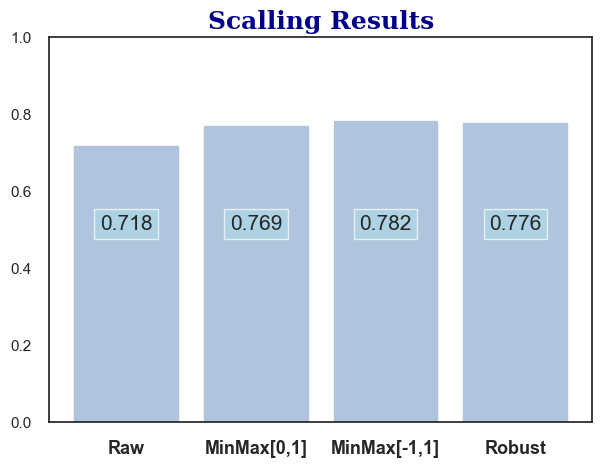

In [29]:
def best_normalization(train_X, train_y, test_X, test_y): 
    '''
    Plots the normalization scores
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
    
    Returns: 
        plot
        
    Notes: 
    Estimator : MLP Classifier
    
    '''
    # getting numerical features
    train_X = train_X.select_dtypes(np.number)
    test_X = test_X.select_dtypes(np.number)
    # raw values
    classifier = MLPClassifier().fit(train_X, train_y)
    
    # min max [0, 1]
    min_max = MinMaxScaler().fit(train_X)
    min_max_train_X = min_max.transform(train_X)
    min_max_test_X = min_max.transform(test_X)
    model_min_max = MLPClassifier().fit(min_max_train_X, train_y)
    
    # min max [-1, 1]
    min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(train_X)
    min_max2_train_X = min_max2.transform(train_X)
    min_max2_test_X = min_max2.transform(test_X)
    model_min_max2 = MLPClassifier().fit(min_max2_train_X, train_y)
    
    # robust
    robust = RobustScaler().fit(train_X)
    robust_train_X = robust.transform(train_X)
    robust_test_X = robust.transform(test_X)
    model_robust = MLPClassifier().fit(robust_train_X, train_y)
    
    # final scores
    x = ['Raw','MinMax[0,1]','MinMax[-1,1]','Robust']
    y = [classifier.score(test_X, test_y),
         model_min_max.score(min_max_test_X, test_y), 
         model_min_max2.score(min_max2_test_X, test_y),
         model_robust.score(robust_test_X, test_y)]

    # Plot  
    plt.figure(figsize = (7,5))
    plt.bar(x, y, color = 'lightsteelblue', edgecolor= 'lightsteelblue')
    # calling the function to add value labels
    addlabels(x, y)
    
    # Customize 
    font1 = {'family':'serif','color':'darkblue', 'fontweight':'bold', 'size':18}
    
    # Layout
    plt.title('Scalling Results', fontdict = font1)
    plt.xticks(fontsize = 13, fontweight='bold')
    plt.ylim([0,1])

    plt.show()

# guarantee reproducibility
np.random.seed(1)

# plot
best_normalization(X_train, y_train, X_test, y_test)

__Notes:__

> 1 - __From the diferent scalling techniques, the Robest Scaler had the better score by a slight margin. It'll be the one used moving forward__

In [30]:
# getting numerical features
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
test_num = test_data.select_dtypes(np.number)

# getting categorical features
X_train_cat = X_train.drop(X_train_num.columns, axis=1)
X_test_cat = X_test.drop(X_test_num.columns, axis=1)
test_cat = test_data.drop(test_num.columns, axis=1)

# Normalizing data
X_train_scaler = MinMaxScaler([-1,1]).fit_transform(X_train[X_train_num.columns])
X_test_scaler =  MinMaxScaler([-1,1]).fit_transform(X_test[X_test_num.columns])
test_scaler = MinMaxScaler([-1,1]).fit_transform(test_data[test_num.columns])

X_train_num_scaled =  pd.DataFrame(X_train_scaler, X_train_num.index, X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_scaler, X_test_num.index, X_test_num.columns)
test_data_num_scaled = pd.DataFrame(test_scaler, test_num.index, test_num.columns)

***
### 4.3 Feature Selection

Feature selection process is __one of the main components of a feature engineering process__. This is how a predictive model is developed by reducing the number of input variables. <p>
Feature selection techniques are employed to __reduce the number of input variables by eliminating redundant or irrelevant features__. It then narrows the set of features to those most relevant to the machine learning model. The feature selection objective in machine learning is to __indentify the most helpful group of variables that can be used to build useful models of the phenomena being studied__.<p>
> * In the machine learning process, feature selection is used to: <p>
>> 1. __Decrease over-fitting__  
>>>  Fewer redundant data means fewer chances of making decisions based on noise.
>> 2. __Improve Accuracy__  
>>>  Less misleading data means better modelling accuracy.
>> 3. __Reduce Training Time__  
>>>  Less data means quicker algorithms. <p>
    
Feature selection techniques can be divided into two types: <p>
* __Supervised__ and __Unsupervised__ <p>
    
But since __Supervised feature selection algorithms are always superior to Semi-Supervised and Unsupervised algorithms in selecting better feature subsets due to its using the labels of samples (target), therefore, only this type of technique will be explored.__ <p>
There are three types __Supervised methods__:
    
>> 1 - __Wrapper Methods__ - use a classifier to assess features or feature subsets <p>
>> Wrapper methods are used to train a model using a subset of features. According to the conclusions drawn from the previous model, it decides whether to include or exclude certain features from the subgroup, it'll be applied wrapper methods like: <p>
>>> * __Forward Selection__ - Starts with __no feature in the model and iterate forward__. On each subsequent repetition, __add the feature that improves the model__ the most __until the addition of a new variable does not improve its performance__ <p>
>>> * __Backward Selection__ - Starts with __all the features during backward elimination and remove the least significant feature at every iteration__, which improves the model's performance. This process is __repeated until no more improvement is observed__  <p>
>>> * __Recursive Feature Elimination__ - __The algorithm aims to find the best performing subset of features by using greedy optimization__ (making the locally optimal choice at each stage with the hope of finding the global optimum). Each iteration __creates a new model and keeps aside the best or worst performing features__. The next model is constructed using the remaining features __until all the features have been exhausted__. The features are then __ranked according to their elimination order__ <p>   
    
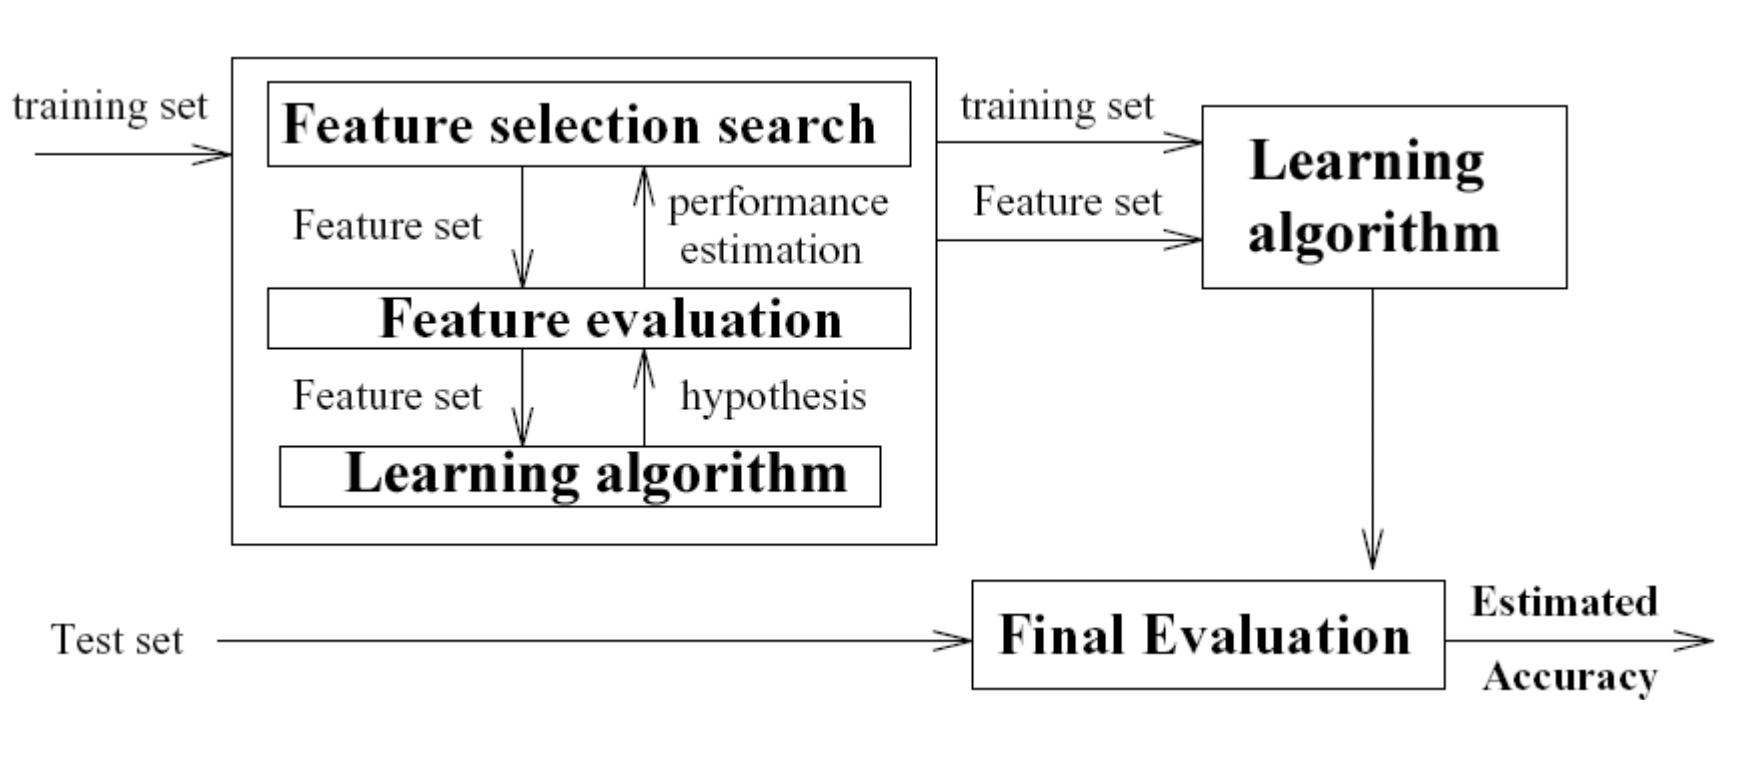   

In [31]:
def wrapper_fs_df(train_X, train_y, test_X, test_y, optimal_n=None):
    '''
    Returns a dataframe with the following wrapper methods: Step Forward Selection, Backward Selection
    and Recursive Feature Elimination applied to the input data
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
        optimal_n (int) - Number of features to keep in model
                          if not defined, the function will calculate the optimal number 
                          by selecting the n with the highest score
    Returns: 
        pandas.dataframe
    
    Notes: 
        Step Forward Selection Estimator: Random Forest
        Backward Selection Estimator: Random Forest
        RFE Base Estimator: Logistic Regression
    '''
    # creating dataframe instance and column containig all features
    df = pd.DataFrame()
    df['Features'] = train_X.columns

    # splitting numerical variables from categorical
    X_train_num = train_X.select_dtypes(np.number)
    X_train_cat = train_X.drop(X_train_num.columns, axis=1)
    X_test_num = test_X.select_dtypes(np.number)
    X_test_cat = test_X.drop(X_test_num.columns, axis=1)
    
                                        ############ SFS ##############
    
    # number of possible numerical features
    n_list= list(range(1,len(X_train_num.columns)))
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = RandomForestClassifier() # build RF classifier to use in feature selection
            SFS = sfs(model, k_features = n) #  creating SFS instance
            X_train_sfs = SFS.fit_transform(X_train_num, train_y) # transforming the data using SFS
            X_test_sfs = SFS.transform(X_test_num)
            model.fit(X_train_sfs, train_y) # fitting model 
            score = model.score(X_test_sfs, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    # creating SFS instance
    SFS = sfs(RandomForestClassifier(), k_features = optimal_n, scoring='f1')
    
    # transforming the data using SFS
    SFS.fit_transform(X = X_train_num, y = train_y)
    
    # getting important features
    sfs_feat = X_train_num.columns[list(SFS.k_feature_idx_)]
    
    # creating SFS column 
    df['Wrapper_SFS'] = df['Features'].apply(lambda x: 'Keep' if x in sfs_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_SFS'] = '-'

                                        ############ SBS ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = RandomForestClassifier() 
            SBS = sfs(model, forward=False, k_features = n, scoring='f1') #  creating SBS instance
            X_train_sbs = SBS.fit_transform(X_train_num, train_y) # transforming the data using SBS
            X_test_sbs = SBS.transform(X_test_num)
            model.fit(X_train_sbs, train_y) # fitting model 
            score = model.score(X_test_sbs, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    # creating SBS instance
    SBS = sfs(RandomForestClassifier(), forward=False, k_features = optimal_n)
    
    # transforming the data using SFS
    SBS.fit_transform(X = X_train_num, y = train_y)
    
    # getting important features
    sbs_feat = X_train_num.columns[list(SBS.k_feature_idx_)]
    
    # creating SBS column 
    df['Wrapper_SBS'] = df['Features'].apply(lambda x: 'Keep' if x in sbs_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_SBS'] = '-'
    
                                        ############ RFE ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = LogisticRegression() # creating model instance
            rfe = RFE(model, n_features_to_select = n) #  creating RFE instance
            X_train_rfe = rfe.fit_transform(X_train_num, train_y) # transforming the data using RFE
            X_test_rfe = rfe.transform(X_test_num)
            model.fit(X_train_rfe, train_y) # fitting model 
            score = model.score(X_test_rfe, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    #  creating RFE instance 
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = optimal_n)

    # transforming the data using RFE
    rfe.fit_transform(X = X_train_num, y = train_y)

    # getting important features
    rfe_feat = list(compress(X_train_num.columns, rfe.support_))

    # creating RFE column 
    df['Wrapper_RFE'] = df['Features'].apply(lambda x: 'Keep' if x in rfe_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_RFE'] = '-'
    
                                     ######################################
    return df

# guarantee reproducibility
np.random.seed(1)

# saving wrapper results
wrapper = wrapper_fs_df(
                        X_train_num_scaled.join(X_train_cat),
                        y_train,
                        X_test_num_scaled.join(X_test_cat),
                        y_test
                       )

wrapper.style

__Notes:__ 

> 1 - __BMI__ seems to add not much value to the models <p>
> 2 - __Mental Health__, __Physical Health__,  __Diabetes Contact__, __High Cholesterol__ and _Blood Pressure__ all are kept in all wrapper feature selection tests

>> 2 - __Filter Methods__ - rank features or feature subsets independently of the predictor (classifier)<p>
>> Filter methods are generally used as preprocessing steps, and their selection is independent of any machine learning algorithm. Features are instead selected based on their scores in various statistical tests to determine their correlation with the outcome variable, which is subjective. Since it's a classification problem it'll be applied the following filter methods: <p>
>>>> * __Kendall's Correlation Coefficient__ - __Correlation is a measure of the linear relationship of 2 or more variables__. The logic behind using correlation for feature selection is that the __good variables are highly correlated with the target__. Furthermore, variables __should be correlated with the target but should be uncorrelated among themselves__. It'll be used the __Kendall's Coefficient__ since it's a non-parametric test that it'll be applied to __numerical input values__ and __categorical output__, the threshold will be +/- 0.50<p>
>>>> * __ANOVA__ is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task<p>
>>>> * __Chi-Square__ - The  __𝜒2  test is used in statistics to test the independence of two events__. More specifically in feature selection it's used to test __whether the occurrence of a specific term and the occurrence of a specific class are independent__<p>
    
Common input variable data types:

__Numerical Variables:__
* Integer Variables
* Floating Point Variables <p>
    
__Categorical Variables:__
* Boolean Variables (dichotomous)
* Ordinal Variables
* Nominal Variables <p><p>
Numerical Output: __Regression predictive modeling problem__
Categorical Output: __Classification predictive modeling problem__
    
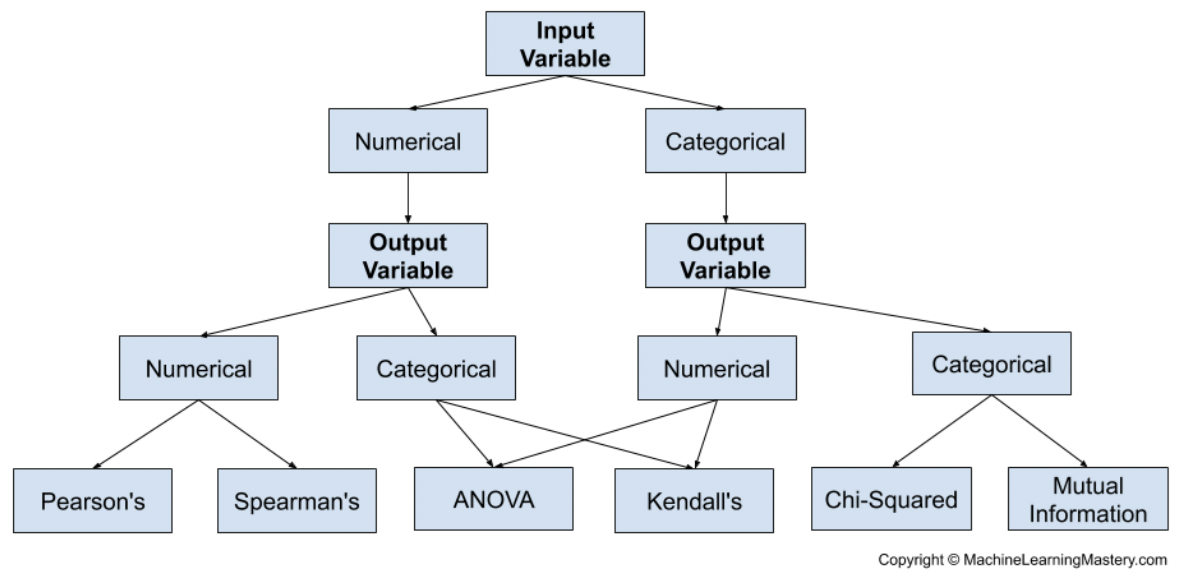

In [32]:
def filter_fs_df(train_X, train_y, test_X, test_y, optimal_n=None):
    '''
    Returns a dataframe with the following filter methods: Kendall's Correlation, Fisher score
    and Chi-Square applied to the input data
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
        optimal_n (int) - Number of features to keep in model
                          if not defined, the function will calculate the optimal number 
                          by selecting the n with the highest score
    Returns: 
        pandas.dataframe
    '''
    # creating dataframe instance and column containig all features
    df = pd.DataFrame()
    df['Features'] = train_X.columns

    # splitting numerical variables from categorical
    X_train_num = train_X.select_dtypes(np.number)
    X_train_cat = train_X.drop(X_train_num.columns, axis=1)
    X_test_num = test_X.select_dtypes(np.number)
    X_test_cat = test_X.drop(X_test_num.columns, axis=1)
    
                                        ############ KENDALL'S ##############
    
    # getting important features
    kendall_feat = []
    for col in train_X.columns: 
        if (np.round(abs(stats.kendalltau(train_X[col], train_y)[0]),2) > .5) & (col in X_train_num.columns):
            kendall_feat.append('Keep')
        elif (np.round(abs(stats.kendalltau(train_X[col], train_y)[0]),2) <= .5) & (col in X_train_num.columns): 
            kendall_feat.append('Discard')
        else: 
            kendall_feat.append('-')
    
    # creating Kendall's column 
    df['Filter_Kendall'] = kendall_feat

                                        ############ ANOVA ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # F-test
        f = f_classif(X_train_num, train_y)

        # dataframe with p-values lower that > .05
        p_value = pd.DataFrame(f[1], index = X_train_num.columns)
        p_value = p_value[p_value < .05]

        # getting important features
        anova_feat = [col for col in p_value.dropna().index]
        
    else: 
        # F-test 
        anova = SelectKBest(score_func=f_classif, k=4)
        
        # fitting data
        anova.fit(X_train_num, train_y)
        
        # getting important features
        anova_feat = X_train_num.columns[anova.get_support()]
        
    
    
    
    # creating ANOVA column 
    df['Filter_ANOVA'] = df['Features'].apply(lambda x: 'Keep' if x in anova_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Filter_ANOVA'] = '-'
    
                                        ############ CHI-SQUARE ##############
    # getting important features
    chi_feat = []
    
    for col in X_train_cat:
        # 𝜒2 test 
        chi_check = pd.crosstab(train_y, X_train_cat[col]) 
        chi2, p, dof, expected = chi2_contingency(chi_check.values)
        chi_expected = pd.DataFrame(expected, columns=chi_check.columns, index =chi_check.index)
        if p < .05:
            chi_feat.append(col)
            
    # creating Chi-Square column 
    df['Filter_CHI2'] = df['Features'].apply(lambda x: 'Keep' if x in chi_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_num.columns), 'Filter_CHI2'] = '-'
    
                                         ######################################
    return df

# guarantee reproducibility
np.random.seed(1)

# saving wrapper results
filtered = filter_fs_df(X_train_num_scaled.join(X_train_cat),
                        y_train,
                        X_test_num_scaled.join(X_test_cat),
                        y_test
                       )

filtered.style

__Notes:__ 

> 1 - __Kendall's correlation__ discards all features __except Diabetes Contact__ (only variable with absolute correlation with target above 0.5)<p>
> 2 - __ANOVA test__, considers all features important <p> 
> 3 - __Chi-Squared__ discards __Name__, __Region__, __Education__, __Smoking Habit__ and __Water Habit__

>> 3 - __Embedded Methods__ - learn which features best contribute to the accuracy of the model while the model is being created <p>
>> Embedded methods combine the __best features of filtering and wrapping methods by implementing algorithms with built-in methods for selecting features__, standard embedded methods are: <p>
>>>> * __LASSO regularization (L1)__ - __Adds penalty on different parameter to reduce freedom, thus it is less likely to fit noise of training data__ / overfit hence improves generalisation. Lasso Regression apart from preventing overfitting also __reduces the coefficients of less important features to zero__ <p>
>>>> * __Random Forest__ -  __Can be used to get the feature importances__, Random Forest improve the variance of simple Decision Trees by incorporating randomness. The criteria to get importance will be __Entropy which is a measure of information that indicates the disorder of the features with the target__. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy

In [33]:
def embedded_fs_df(train_X, train_y, test_X, test_y, optimal_n=None):
    '''
    Returns a dataframe with the following embedded methods: LASSO and Random Forest Entropy Importance
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
        optimal_n (int) - Number of features to keep in model
                          if not defined, the function will calculate the optimal number 
                          by selecting the n with the highest score
    Returns: 
        pandas.dataframe
    '''
    # creating dataframe instance and column containig all features
    df = pd.DataFrame()
    df['Features'] = train_X.columns

    # splitting numerical variables from categorical
    X_train_num = train_X.select_dtypes(np.number)
    X_train_cat = train_X.drop(X_train_num.columns, axis=1)
    X_test_num = test_X.select_dtypes(np.number)
    X_test_cat = test_X.drop(X_test_num.columns, axis=1)
    
                                        ############ LASSO ##############
    
    # creating a Lasso instance
    reg = LassoCV()

    # fitting data
    reg.fit(X_train_num_scaled, train_y)

    # dataframe with absolute coefficients
    coef = pd.DataFrame(abs(reg.coef_), index = X_train_num_scaled.columns)

    # getting most important features
    coef = coef[coef > .1]
    lasso_feat = [col for col in coef.dropna().index]

    # creating LASSO column 
    df['Embedded_LASSO'] = df['Features'].apply(lambda x: 'Keep' if x in lasso_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Embedded_LASSO'] = '-'

                                        ############ RANDOM FOREST ##############
    
    # getting feature importance
    entropy_importance = RandomForestClassifier(criterion='entropy').fit(X_train_num_scaled, train_y)
    
    # dataframe with features' importance
    importance =  pd.DataFrame(entropy_importance.feature_importances_, index = X_train_num_scaled.columns)
    
    # getting most important features
    importance = importance[importance > .04]
    rf_feat = [col for col in importance.dropna().index]  
    
    # creating Random Forest column 
    df['Embedded_RF'] = df['Features'].apply(lambda x: 'Keep' if x in rf_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Embedded_RF'] = '-'
    
                                         ######################################
    return df

# guarantee reproducibility
np.random.seed(1)

# saving wrapper results
embedded_and_tree = embedded_tree_fs_df(X_train_num_scaled.join(X_train_cat),
                                        y_train,
                                        X_test_num_scaled.join(X_test_cat),
                                        y_test
                                       )

embedded_and_tree.style

__Notes:__ 

> 1 - __Random Forest__ considers __all current numerical features important__ (importance coefficient above threshold of 0.4)<p>
> 2 - __LASSO Regression__ discards all variables except __Diabetes Contact, Physical and Mental Health__ (all three with coefficients above threshold of 0.4)

### FEATURE SELECTION CONCLUSION

# merging all feature selection methods
ft_importance = wrapper.merge(filtered).merge(embedded_and_tree)
        
ft_importance['Discard'] = ft_importance.apply(lambda x: max([
                                                      x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE'],
                                                      x['Filter_Kendall'], x['Filter_ANOVA'], x['Filter_CHI2'],
                                                      x['Embedded_LASSO'], x['Embedded_RF']
                                                             ],
                                                key = [
                                                      x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE'],
                                                      x['Filter_Kendall'], x['Filter_ANOVA'], x['Filter_CHI2'],
                                                      x['Embedded_LASSO'], x['Embedded_RF']
                                                ].count), axis=1)

ft_importance.loc[ft_importance['Discard'] == '-', 'Discard'] = ft_importance['Filter_CHI2']
ft_importance.style

__Notes:__ 

> 1 - __BMI__, __Height__ and __Age__ seem to add not much value to the models since majority of the tests, discarded them, therefore they'll be dropped<p>
> 2 - __Diabetes Contact__ seems to be the most important numerical feature, since it was kept in all tests__<p> 
> 3 - __Name, Region, Education__, __Smoking Habit__ and __Water Habit__ seem to add not much value to the models, therefore they'll be dropped

In [34]:
# not important features
discard_num = ['BMI']
discard_cat = ['Name', 'Region', 'Education','Smoking_Habit', 'Water_Habit']

# dropping not important features
X_train_num_scaled.drop(discard_num, axis=1, inplace=True)
X_train_cat.drop(discard_cat, axis=1, inplace=True)
X_test_num_scaled.drop(discard_num, axis=1, inplace=True)
X_test_cat.drop(discard_cat, axis=1, inplace=True)
test_data_num_scaled.drop(discard_num, axis=1, inplace=True)
test_cat.drop(discard_cat, axis=1, inplace=True)

***
### 4.4 Encoding Categorical

__Encoding categorical data is a process of converting categorical data into integer format__, so that the data with converted categorical values can be provided to the models to give and improve the predictions. Since all categorical features at the moment have low cardinality, it'll be used the __One Hot Encoder__ which converts __categorical variables into several binary columns__, where a 1 indicates the presence of that row belonging to that category

There are __two main disadvantages in the One Hot Encoding process__, variables with __high cardinality (large number of unique values) will generate too many predictors__, also, __this method produces multicollinearity among the various variables, lowering the model's accuracy__

In this case __there are not currently features with high cardinality__ and __multicollinearity will be checked before modelling__

# Change Yes and No to 1 and 0s to avoid multicollinearity
X_train_cat['Exercise'] = X_train_cat['Exercise'].map({'Yes': 1, 'No': 0})
X_test_cat['Exercise'] = X_test_cat['Exercise'].map({'Yes': 1, 'No': 0})
test_cat['Exercise'] = test_cat['Exercise'].map({'Yes': 1, 'No': 0})

# Change categorical variables into numeric representation
X_train_cat = pd.get_dummies(X_train_cat, columns = X_train_cat.drop(['Exercise'], axis=1).columns)
X_test_cat = pd.get_dummies(X_test_cat, columns = X_test_cat.drop(['Exercise'], axis=1).columns)
test_cat = pd.get_dummies(test_cat, columns = test_cat.drop(['Exercise'], axis=1).columns)

In [35]:
# one hot encoding categorical features
encoder = ce.OneHotEncoder(X_train_cat.columns, use_cat_names=True)
# fitting training data
encoder.fit(X_train_cat)
# transforming data
X_train_cat= encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)
test_cat = encoder.transform(test_cat)

***
### Final Pre-processing



__For final Pre-processing__ it'll be checked __multicollinearity (occurrence of high intercorrelations among two or more independent variables)__ after categorical encoding. Finally, it'll also be prepared raw and normalized data for modelling after feature selection. This will allow tree-based models to work with raw data __(showed better performance with raw data)__ and scaled for other models

In [62]:
# getting best features in raw data
X_train_num = X_train_num[X_train_num_scaled.columns]
X_test_num = X_test_num[X_test_num_scaled.columns]
test_num = test_num[test_data_num_scaled.columns]

# setting raw data
X_train = X_train_num.join(X_train_cat)
X_test = X_test_num.join(X_test_cat)
test_data = test_num.join(test_cat)

# setting scaled data
X_train_scaled = X_train_num_scaled.join(X_train_cat)
X_test_scaled = X_test_num_scaled.join(X_test_cat)
test_data_scaled = test_data_num_scaled.join(test_cat)
test_data = test_num.join(test_cat)

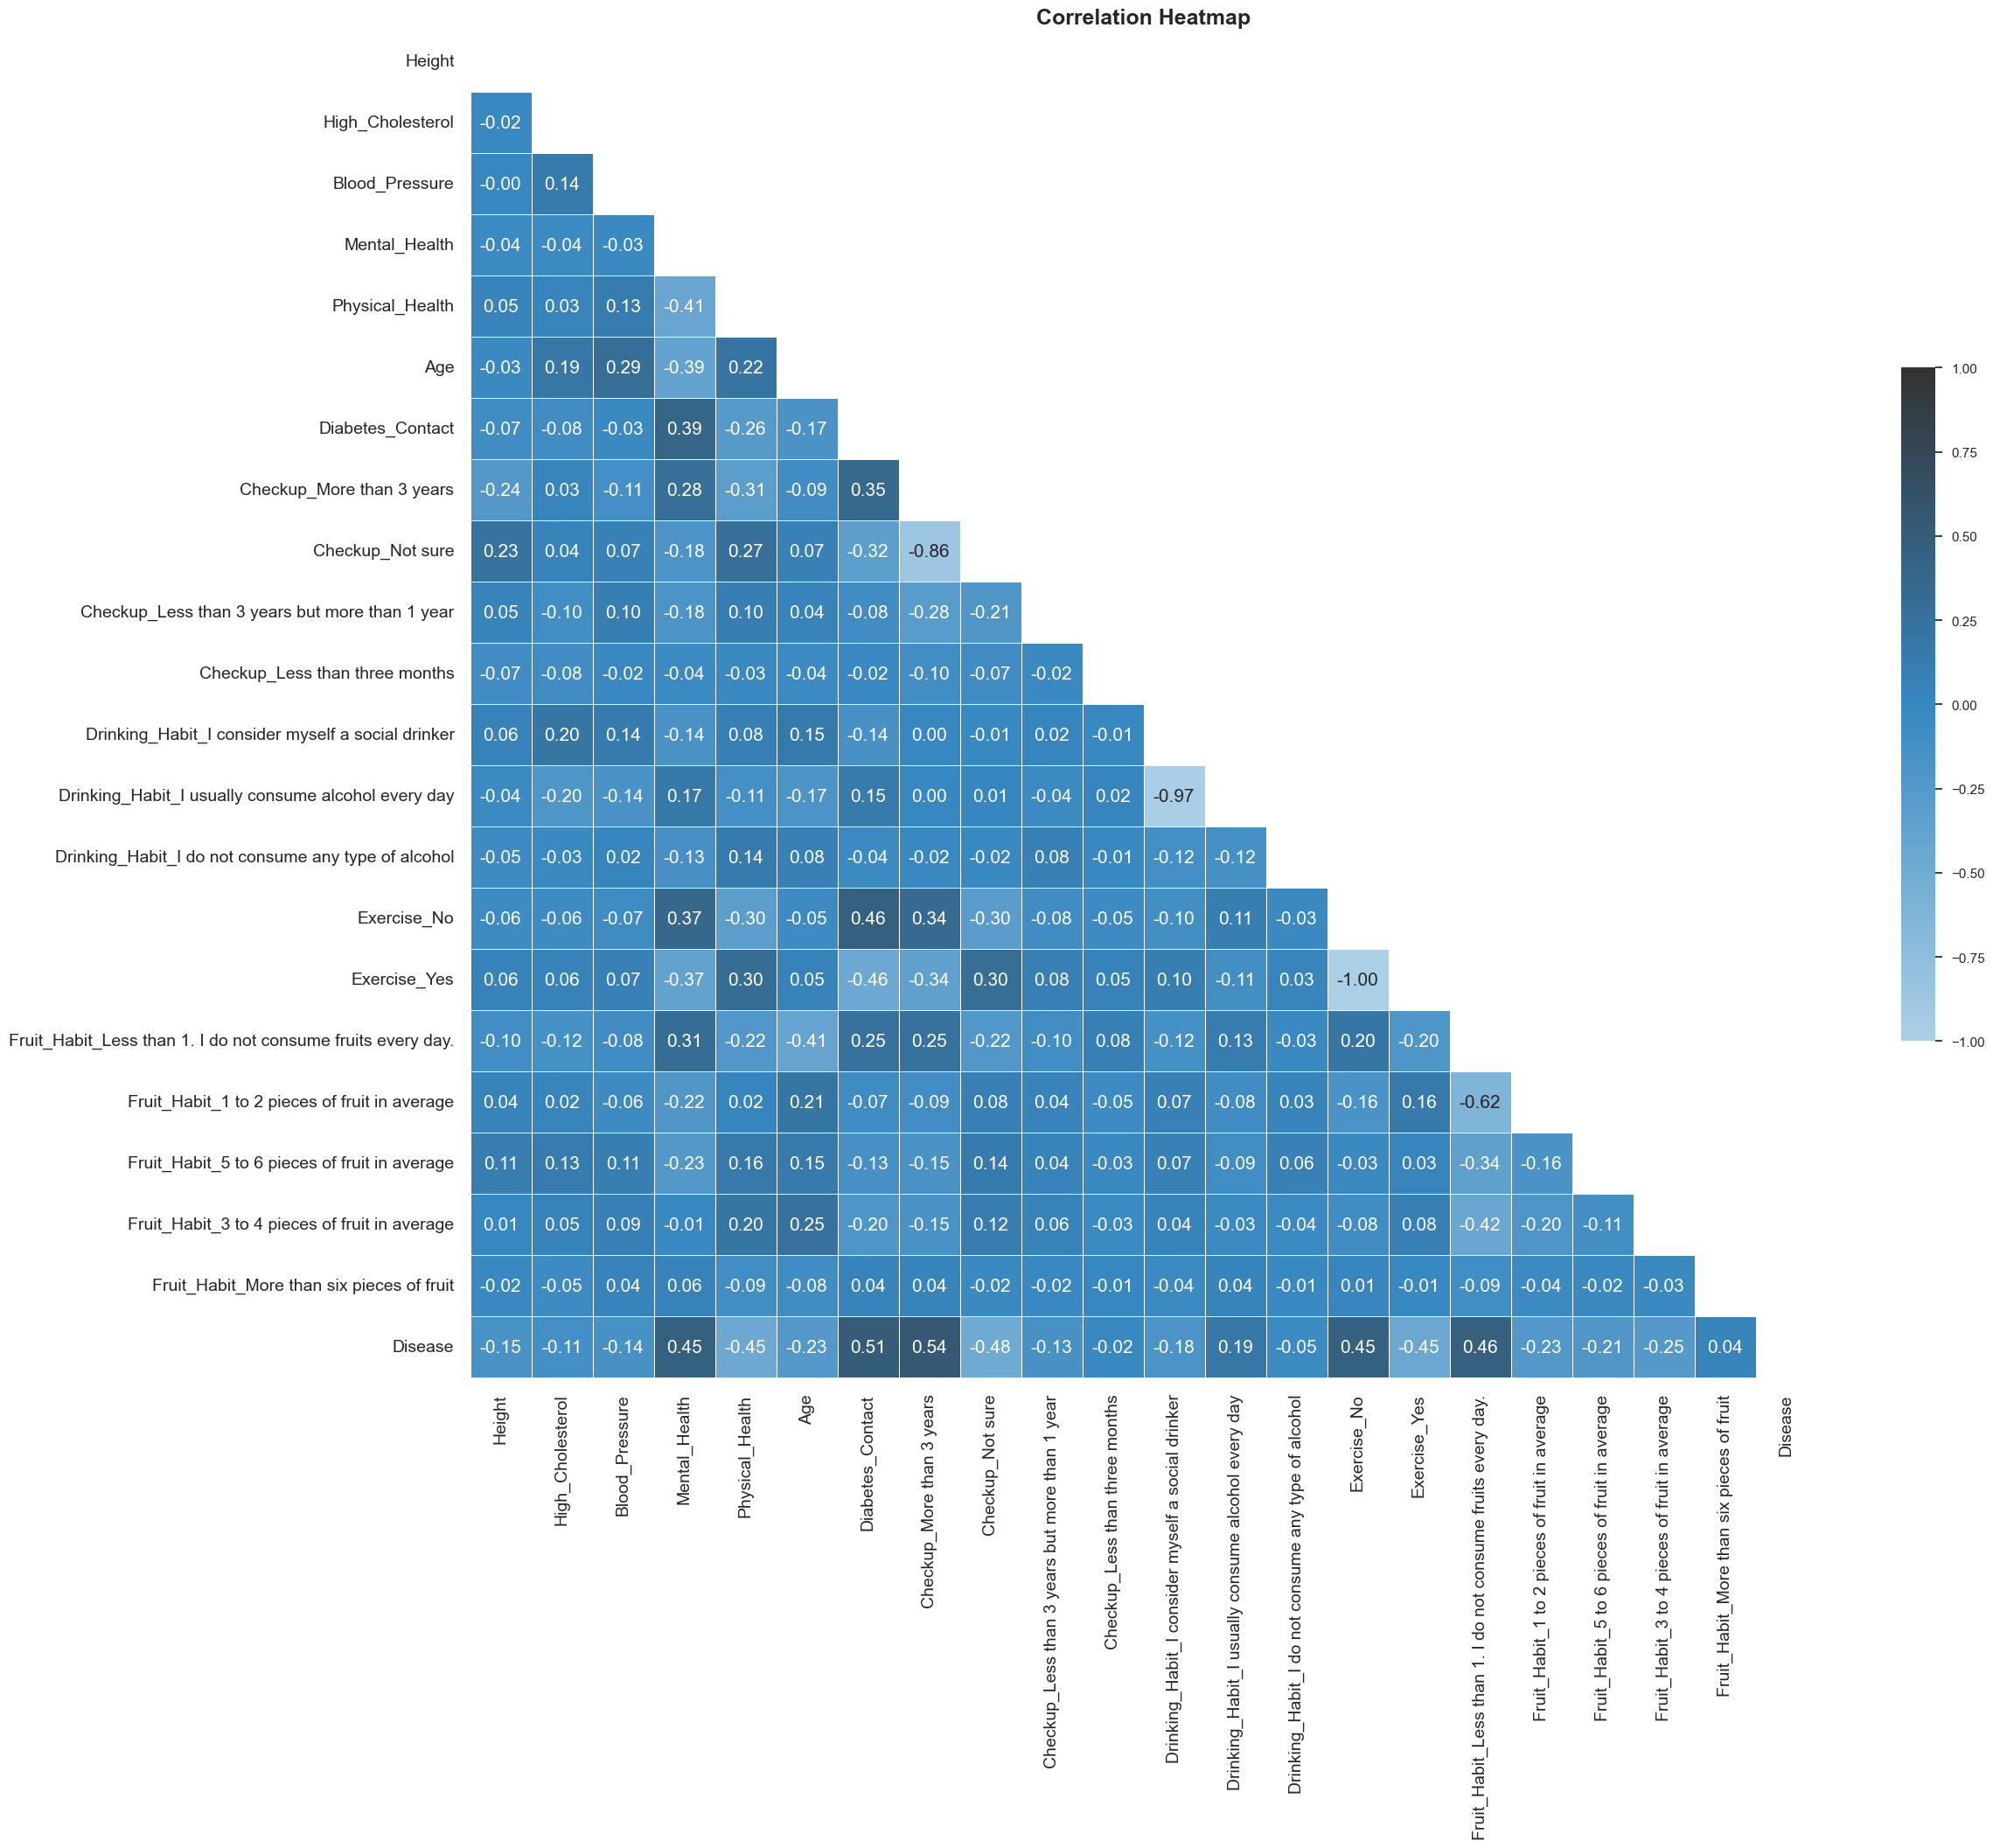

In [37]:
# Checking multicollinearity before modelling
# getting target again for visualization purposes
tmp = X_train.reset_index().merge(y_train.reset_index(), on='PatientID', how='left').set_index('PatientID')
# plot
cmap = sns.color_palette('Blues_d', as_cmap=True)

# Computing the correlation matrix
corr = tmp.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize = (25, 20))


sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidths = .5,
            cbar_kws = {'shrink': .5},
            annot = True,
            fmt = '.2f',
            annot_kws={'size':15}
           )

#customize
plt.title('Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

__Notes:__ 

> 1 - __It'll be dropped features that that have low correlation with the target but are correlated among predictors__<p> 
> 2 - It was now proved that the recently generated feature __Diabetes Contact__ has the sames correlation strength with the target as __Diabetes "Neither I nor my immediate family have diabetes."__ and more than the rest __Diabetes features__, therefore the __original Diabetes features will be dropped to avoid redundancy__ <p>
> 3 - __Drinking Habit "I consider myself a social drinker"__ is highly correlated with __Drinking Habit "I usually consume alcohol every day"__ and has a lower correlation with the target, therefore __it'll be dropped__ <p> 
> 4 - __Checkup "Not sure"__ is highly correlated with __Checkup "More than 3 years"__ and has a lower correlation with the target, therefore __it'll be dropped__ <p>
> 5 - __Fruit Habit "1 to 2 pieces of fruit in average"__ is highly correlated with __Fruit Habit "Less than 1. I do not consume fruits every day."__ and has a lower correlation with the target, therefore __it'll be dropped__ 

In [38]:
# columns that cause multicollinearity and have lower correlation strength with target
#old_diabetes_cols = [col for col in X_train.drop('Diabetes_Contact', axis=1).columns if 'Diabetes' in col]
multicol_drop = [
                'Drinking_Habit_I consider myself a social drinker',
                'Checkup_Not sure',
                'Fruit_Habit_1 to 2 pieces of fruit in average',
                'Exercise_No'
                ] #+ old_diabetes_cols
# raw data
X_train.drop(multicol_drop, axis=1, inplace=True)
X_test.drop(multicol_drop, axis=1, inplace=True)
test_data.drop(multicol_drop, axis=1, inplace=True)
# scaled data
X_train_scaled.drop(multicol_drop, axis=1, inplace=True)
X_test_scaled.drop(multicol_drop, axis=1, inplace=True)
test_data_scaled.drop(multicol_drop, axis=1, inplace=True)
test_data.drop(multicol_drop, axis=1, inplace=True)

***
## <font color='SeaGreen'>5. Modelling </font>

### 5.1 Cross-Validation Study


Cross-validation is a __resampling procedure used to evaluate machine learning models on a limited data sample__. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation

> * There are several methods for Cross-validation, some of them are: <p>
>> * __K-Folds cross-validator (KFold)__ <p>
>>> __Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds__ (without shuffling by default). Each fold is then__ used once as a validation while the k - 1 remaining folds form the training set__ <p>
>> * __Repeated K-Fold cross validator (RepeatedKFold)__ <p>
>>> __Repeats K-Fold n times with different randomization in each repetition__ <p>
>> * __Stratified K-Folds cross-validator (StratifiedKFold)__<p>
>> * Random permutation cross-validator (ShuffleSplit)__ <p>
>>> __Yields indices to split data into training and test sets__ <p>
>>> __Note: contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets__
>>> Provides train/test indices to split data in train/test sets. __This cross-validation object is a variation of KFold that returns stratified folds__. The folds are made by __preserving the percentage of samples for each class__<p>
>> * __Stratified ShuffleSplit cross-validator (StratifiedShuffleSplit)__<p>
>>> Provides train/test indices to split data in train/test sets. __This cross-validation object is a merge of StratifiedKFold and ShuffleSplit__, which returns stratified randomized folds. The __folds are made by preserving the percentage of samples for each class__ <p>
>>> __Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets__<p>
    
The method that __penalizes the models' accuracy the most (by averaging lower scores than the others), will be the one used to evaluate models__

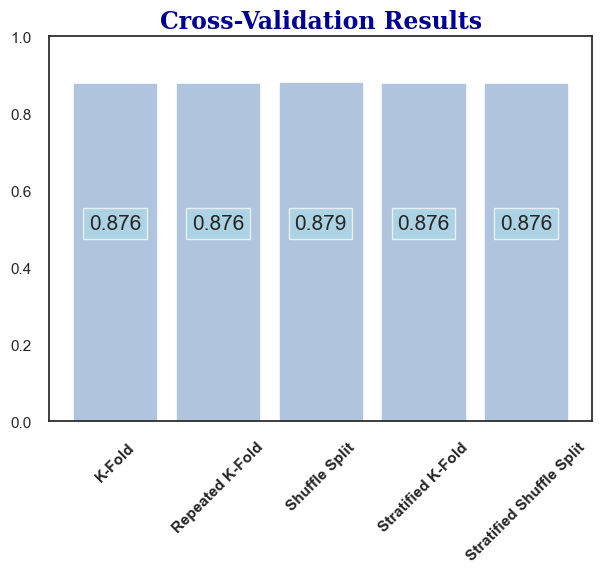

In [39]:
def best_cross_validation(train_X, train_y): 
    '''
    Plots the models' mean accuracy with different Cross-validation methods
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
    
    Returns: 
        plot
        
    Notes: 
        Estimator : Logistic Regression
    
    '''
    # initiating split methods' instances with 10 folds each
    kf = KFold(n_splits=10)
    rkf = RepeatedKFold(n_splits=10, n_repeats=2)
    ss = ShuffleSplit(n_splits=10)
    skf = StratifiedKFold(n_splits=10)
    sss = StratifiedShuffleSplit(n_splits=10)

    # Cross-validation methods list 
    cv_methods = [kf, rkf, ss, skf, sss]

    # initiating model instance 
    model = LogisticRegression()

    score_train = []
    score_test = []
    cv_train_results = []

    for cv in range(len(cv_methods)):
        avg_method = []
        for train_index, test_index in cv_methods[cv].split(train_X, y_train):
            X_train_, X_test_ = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
            y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
             # fitting data
            model.fit(X_train_, y_train_)

            # getting results
            avg_method.append(model.score(X_train_, y_train_))
        cv_train_results.append(np.mean(avg_method))

    # final scores
    x = ['K-Fold', 'Repeated K-Fold', 'Shuffle Split', 'Stratified K-Fold', 'Stratified Shuffle Split']
    y = cv_train_results

    # Plot  
    plt.figure(figsize = (7,5))
    plt.bar(x, y, color = 'lightsteelblue', edgecolor= 'lightsteelblue')
    # calling the function to add value labels
    addlabels(x, y)

    # Customize 
    font1 = {'family':'serif','color':'darkblue', 'fontweight':'bold', 'size':17}

    # Layout
    plt.title('Cross-Validation Results', fontdict = font1)
    plt.xticks(fontsize = 11,rotation=45, fontweight='bold')
    plt.ylim([0,1])

    plt.show()
    
# guarantee reproducibility
np.random.seed(1)

# plot
best_cross_validation(X_train_scaled, y_train)

__Notes:__ 

> * __K-Fold, Repeated K-Fold and Stratified K-fold seem to be the methods that penalizes the models' average accuracy the most__, therefore any of these can be used

In [40]:
def performance_metrics(y_Train, y_PredTrain, y_Test, y_PredTest):
    '''
    Creates Dataframe with the main benchmark metrics for Classfication models
    
    Args: 
        y_Train -      Series with target values used to train model
        y_PredTrain -  Series with predicted values from y_Train
        y_Test -       Series with test values used to validate model
        y_PredTest -   Series with predicted values from y_Test
        
    Returns: 
        pandas.core.frame.DataFrame
    '''
    # Columns
    measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
    
    # Results for train data
    train_results = [
                round(metrics.accuracy_score(y_Train, y_PredTrain),3),  # Calculating accuracy
                round(metrics.precision_score(y_Train, y_PredTrain),3),  # Calculating precision
                round(metrics.recall_score(y_Train, y_PredTrain),3),  # Calculating recall
                round(metrics.f1_score(y_Train, y_PredTrain),3),  # Calculating f1 score
                round(metrics.roc_auc_score(y_Train, y_PredTrain),3)  # Calculating ROC area under the curve
                ]
    # Results for test data
    test_results = [
               round(metrics.accuracy_score(y_Test, y_PredTest),3),  # Calculating accuracy
               round(metrics.precision_score(y_Test, y_PredTest),3),  # Calculating precision
               round(metrics.recall_score(y_Test, y_PredTest),3),  # Calculating recall
               round(metrics.f1_score(y_Test, y_PredTest),3),  # Calculating f1 score
               round(metrics.roc_auc_score(y_Test, y_PredTest),3)  # Calculating ROC area under the curve
               ]
    
    results = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})
    
    # Comparison column
    results['Difference'] = round(results['Train'] - results['Test'], 2) 
    
    return results

In [41]:
# Setting models seed for reproducibility
seed = 0

# Creating base classifiers' instance
# tree based  & ensemble boosting models (better performance with raw data)
DT_model = DecisionTreeClassifier(random_state=seed).fit(X_train, y_train) # Decision Tree
RF_model = RandomForestClassifier(random_state=seed).fit(X_train, y_train) # Random Forest
ET_model = ExtraTreesClassifier(random_state=seed).fit(X_train, y_train) # Extra Tree
HGB_model = HistGradientBoostingClassifier(random_state=seed).fit(X_train, y_train)# Histogram-based Gradient Boosting
ADA_model =  AdaBoostClassifier(random_state = seed).fit(X_train, y_train) # Adaptative Boosting
GB_model = GradientBoostingClassifier(random_state=seed).fit(X_train, y_train) # Gradient Boosting
XGB_model = XGBClassifier(random_state=seed).fit(X_train, y_train) # Extreme Gradient Boosting

# list of models that'll work with raw data
raw = [DT_model, RF_model, ET_model, HGB_model, ADA_model, GB_model, XGB_model]

# other models perform better with normalized data
LR_model = LogisticRegression(random_state=seed).fit(X_train_scaled, y_train) # Logistic Regression
KNN_model = KNeighborsClassifier().fit(X_train_scaled, y_train) # K-Nearest Neighbors
B_model = BaggingClassifier(random_state=seed).fit(X_train_scaled, y_train) # Bagging Classifier
SVC_model = SVC(random_state=seed).fit(X_train_scaled, y_train) # Support Vector Classification
Gaussian_model = GaussianNB().fit(X_train_scaled, y_train) # Gaussian Naive Bayes
NN_model = MLPClassifier(random_state=seed).fit(X_train_scaled, y_train) # Neural Network
SGD_model = SGDClassifier(random_state=seed).fit(X_train_scaled, y_train) #  Stochastic Gradient Descent

# Creating estimators list
estimators = [
            ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier()),
            ('ET', ExtraTreesClassifier()), ('HGB', HistGradientBoostingClassifier()),
            ('ADA', AdaBoostClassifier()), ('GB', GradientBoostingClassifier()),
            ('XGB', XGBClassifier()), ('LR', LogisticRegression()),
            ('KNN', KNeighborsClassifier()), ('Bagging', BaggingClassifier()), 
            ('SVM', SVC()), ('Gaussian', GaussianNB()), ('NN', MLPClassifier()),
            ('SGD', SGDClassifier())
              ]

# Creating base ensemble models instances
S_model = StackingClassifier(estimators).fit(X_train_scaled, y_train) #  Stacking
V_model = VotingClassifier(estimators).fit(X_train_scaled, y_train) #  Voting

# all base models list
models = [DT_model, RF_model, ET_model, HGB_model, ADA_model,
          GB_model, XGB_model, LR_model,KNN_model, B_model, SVC_model,
          Gaussian_model, NN_model, SGD_model, S_model , V_model
         ]

In [42]:
def model_df(model_list, raw_list, raw_X_test, scaled_X_test, test_y):
    '''
    Creates Dataframe with the main benchmark metrics for Classfication models
    
    Args: 
        model_list (list) - List with model instances
        raw_list (list) -  List of models that'll be trained with raw data
        raw_X_test (dataframe) - Raw test data
        scaled_X_test (dataframe) - Scaled test data
        test_y (dataframe) - Test target
        
    Returns: 
        pandas.core.frame.DataFrame
    '''
    # creating list of models names
    model_str = [str(model) for model in model_list] # getting model raw names
    # formating names
    model_str = [model.split('(', 1)[0] for model in model_str]
    model_name = [' '.join(re.findall('[A-Z][^A-Z]*', model)) for model in model_str]
    
    # creating dataframe for results
    df = pd.DataFrame(columns = ['Model', 'F1-Score', 'Accuracy', 'Precision', 'Recall'])
    
    # getting models' results
    for model in range(len(model_list)):
        # if its fitted with scale data
        if model_list[model] in raw_list:
            instance = model_list[model] # instance model
            y_pred = instance.predict(raw_X_test) # raw data prediction

            # benchmark metrics
            f1 = metrics.f1_score(test_y, y_pred, average='micro')
            accuracy = metrics.accuracy_score(test_y, y_pred)
            precision = metrics.precision_score(test_y, y_pred, average='micro')
            recall = metrics.recall_score(test_y, y_pred, average='micro')

            # adding row with model name and respective metrics
            df.loc[model] = [model_name[model], f1, accuracy, precision, recall]
            
        # otherwise its fitted with scale data        
        else: 
            #getting models' results
            instance = model_list[model] # instance model
            y_pred = instance.predict(scaled_X_test) # scaled data prediction

            # benchmark metrics
            f1 = metrics.f1_score(test_y, y_pred, average='micro')
            accuracy = metrics.accuracy_score(test_y, y_pred)
            precision = metrics.precision_score(test_y, y_pred, average='micro')
            recall = metrics.recall_score(test_y, y_pred, average='micro')

            # adding row to with model name and respective metrics
            df.loc[model] = [model_name[model], f1, accuracy, precision, recall]

    # sorting by the F1-score
    df.sort_values(by = 'F1-Score', ascending = False, inplace = True)
    # setting Model names as index
    df.set_index('Model', inplace = True)
    
    return df

### 5.1 Base Models Perfomance

In [43]:
# checking best base models          
base_model = model_df(models, raw, X_test, X_test_scaled, y_test)

base_model.style

__Notes:__ 
    
> 1 - __Tree-based & Ensemble models__ seem to have better performances

***
### Hyperparameter Tuning

__Hyperparameter tuning__ (or hyperparameter optimization) is the process of __determining the right combination of hyperparameters that maximizes the model performance__. It works by running multiple trials in a single training process. 
> * There are __two main method for Hyperparameter tuning, and they are: <p>
> * __Grid Search__ - __Exhaustive search over specified parameter values for an estimator__ <p>
> * __Random Search__ - __In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions__. The number of parameter settings that are tried is given by n_iter <p>

Grid search _is computationally expensive but more effective__ while random search is __less is faster but less efective__. __For models with high number of parameter possibilities  it'll be implemented Random Search and Grid Search otherwise__
    
__Notes:__ 
    
* __Best parameters will be defined by F1-Score__

In [44]:
# Setting Model parameters for hyper tuning
# tree based  & ensemble boosting models (better performance with raw data)
# Decision Tree
DT_params = {'criterion' : ('gini', 'entropy'),
             'splitter': ('best', 'random'),
             'max_features': ('auto', 'sqrt', 'log2'),
             'max_depth': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
             'min_samples_split' : (2, 4, 6),
             'class_weight': ('balanced', None)
              }

# Random Forest
RF_params = {'criterion': ('gini', 'entropy'),
             'n_estimators': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
             'max_depth': (5,10,20,30,50),
             'bootstrap' : (True, False), 
             'oob_score' : (True, False), 
             'warm_start' : (True, False),
             'max_features' : ('auto', 'log2', 'sqrt'), 
             'min_samples_split' : (2, 5, 10),
             'min_samples_leaf' : (1, 2, 4),
             'class_weight' : ('balanced', 'balanced_subsample')
            }

# Extra Tree
ET_params = {'n_estimators': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
             'max_depth': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
             'bootstrap' : (True, False), 
             'oob_score' : (True, False), 
             'warm_start' : (True, False),
             'min_samples_split': (2, 5, 10, 15, 100),
             'min_samples_leaf': (1, 2, 5, 10),
             'max_features': ('auto', 'sqrt', 'log2')
            }

# Histogram-based Gradient Boosting
HGB_params = {'max_iter': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
              'max_leaf_nodes': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
              'min_samples_leaf': (1, 2, 5, 10),
              'max_depth': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50)
             }

# Adaptative Boosting
ADA_params = {'n_estimators': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
              'learning_rate': (.001, .01, .1, 1, 10, 100),
              'base_estimator': (RandomForestClassifier(),GradientBoostingClassifier(),
                                XGBClassifier(),HistGradientBoostingClassifier(),
                                ExtraTreesClassifier(), DecisionTreeClassifier()
                                ),
              'algorithm': ('SAMME.R', 'SAMME')
             }

# Gradient Boosting
GB_params = {'n_estimators': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
             'learning_rate': (1, .5, .25, .1, .05, .01),
             'max_depth': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
             'min_samples_split': (2, 5, 10, 15, 100),
             'min_samples_leaf': (1, 2, 5, 10),
             'max_features':  list(range(1, len(X_train.columns)))
            }

# Extreme Gradient Boosting
XGB_params = {'n_estimators': (10,20,30),
              'learning_rate': (.05, .075, .1, .25, .5, .75, 1),
              'max_depth': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
               }

# other models perform better with normalized data
# Logistic Regression
LR_params = {'penalty': ('l1', 'l2', 'elasticnet', 'none'), # l1 lasso; l2 ridge
             'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
             'max_iter': (100, 1000, 2500, 5000),
             'multi_class': ('auto', 'ovr', 'multinomial'),
             'fit_intercept': (True, False),
             'dual': (True, False),
             'C': (.25, .5, .75, 1),
             'warm_start': (True, False),
             'intercept_scaling': (1, 2, 5, 10)
             }

# K-Nearest Neighbors
KNN_params = {'n_neighbors': (1, 3, 5, 11, 19),
              'weights': ('uniform', 'distance'),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': (1, 5, 10, 30, 60, 100),
              'p': (1, 2), # 1 - Manhatan Distance; 2 - Euclidean Distance
              'metric': ('minkowski', 'euclidean', 'manhattan')
             }

# Bagging Classifier
B_params = {'n_estimators': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
            'max_samples': (.1, .2, .3, .4, .5, .6, .7, .8, .9, 1),
            'max_features': (.1, .2, .3, .4, .5, .6, .7, .8, .9, 1),
            'bootstrap': (True, False),
            'bootstrap_features': (True, False)
           }

# Support Vector Classification
SVC_params = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'degree': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
              'gamma': ('scale', 'auto'),
              'coef0': (.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1),
              'shrinking': (True, False),
              'probability': (True, False),
              'tol': (0.001, 0.0001, 0.00001),
              'cache_size': (200, 400, 600, 800, 1000),
              'class_weight': ('balanced', None),
              'max_iter': (-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
              'decision_function_shape': ('ovo', 'ovr'),
              'break_ties': (True, False),
              'C': (0.1, 1, 10, 100, 1000)
             }

# Gaussian Naive Bayes
Gaussian_params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Neural Network
NN_params = {'hidden_layer_sizes': [(100, 100, 100), (100, 100), (100, 100, 100, 100), 
                                    (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ('lbfgs', 'sgd', 'adam'),
             'alpha' : (.0001, .05),
             'learning_rate': ('constant','adaptive', 'invscaling'),
             'max_iter': (200, 500, 1000, 2000, 5000, 10000),
             'learning_rate_init': list(np.linspace(.001, .1, 5))
              
            }

#  Stochastic Gradient Descent
SGD_params = {'warm_start': (True, False),
              'penalty': ('l2', 'l1', 'elasticnet'),
              'max_iter': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
              'loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
              'fit_intercept': (True, False),
              'eta0': (.01, .1, 1, 10, 100),
              'epsilon': (.01, .1, 1, 10, 100), 
              'average': (True, False),
              'alpha': (.0001, .001, .01, .1, 1, 10, 100, 1000),
              'tol': (1e-4, 1e-3, 1e-2, 1e-1, 1),
              'max_iter': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
              'eta0': (.01, .1, 1, 10, 100),
              'average': (True, False)
             }

#  Stacking Classifier
S_params_1 = {'final_estimator': (LogisticRegression(), RandomForestClassifier(),
                                GradientBoostingClassifier(), KNeighborsClassifier(),
                                SVC(), GaussianNB(), MLPClassifier(), XGBClassifier(),
                                DecisionTreeClassifier(), ExtraTreesClassifier(),
                                HistGradientBoostingClassifier(), AdaBoostClassifier(),
                                SGDClassifier(), BaggingClassifier())
             }

S_params_2 ={'stack_method': ('auto', 'predict_proba', 'predict', 'decision_function'),
             'passthrough': (True, False)
           }

 #  Voting Classifier
V_params = {'voting': ('hard', 'soft'),
            'weights': ((1,1,1,1,1,1,1,1,1,1,1,1,1,1), (2,1,1,1,1,1,1,1,1,1,1,1,1,1),
            (1,2,1,1,1,1,1,1,1,1,1,1,1,1), (1,1,2,1,1,1,1,1,1,1,1,1,1,1), (1,1,1,2,1,1,1,1,1,1,1,1,1,1),
            (1,1,1,1,2,1,1,1,1,1,1,1,1,1), (1,1,1,1,1,2,1,1,1,1,1,1,1,1), (1,1,1,1,1,1,2,1,1,1,1,1,1,1),
            (1,1,1,1,1,1,1,2,1,1,1,1,1,1), (1,1,1,1,1,1,1,1,2,1,1,1,1,1), (1,1,1,1,1,1,1,1,1,2,1,1,1,1),
            (1,1,1,1,1,1,1,1,1,1,2,1,1,1), (1,1,1,1,1,1,1,1,1,1,1,2,1,1), (1,1,1,1,1,1,1,1,1,1,1,1,2,1),
            (1,1,1,1,1,1,1,1,1,1,1,1,1,2)),
            'flatten_transform': (True, False),
           }



In [45]:
def grid_best_params(model, model_params, raw_list):
    '''
    Returns Grid Search best parameters for imput model  
    
    Args:
        model (sklearn classifier) - Input classifier
        model_params (dict) - Input model parameters dictionary
        raw_list (list) - List of models
    
    Returns: 
        print
    '''
    # grid search instance
    grid_search = GridSearchCV(model, model_params, cv = 5, scoring= 'f1')
    
    # if model takes raw data
    if model in raw_list:
        grid_search.fit(X_train, y_train)
    else: 
        grid_search.fit(X_train_scaled, y_train)
     
    # getting best parameters
    best_params =  grid_search.best_params_.values()   
    
    return list(best_params)

In [46]:
def random_best_params(model, model_params, raw_list, n_iter):
    '''
    Returns Random Search best parameters for imput model 
    
    Args:
        model (sklearn classifier) - Input classifier
        model_params (dict) - Input model parameters dictionary
        raw_list (list) - List of models
        n_iter (int) - Number of random iterations
    
    Returns: 
        print
    '''
    # random search instance
    random_search = RandomizedSearchCV(model, model_params, n_iter = n_iter, cv = 10, scoring= 'f1', random_state = 0)
    
    # if model takes raw data
    if model in raw_list:
        random_search.fit(X_train, y_train)
    else: 
        random_search.fit(X_train_scaled, y_train)
    
    # getting best parameters
    best_params =  random_search.best_params_.values() 
    
    return list(best_params)

In [47]:
# ATENÇÃO ESTA CÉLULA DEMORA A CORRER

# hyperparameter tuning
begin = time.perf_counter()

# Decision Tree
DT_best_params = grid_best_params(DT_model, DT_params, raw)

# Random Forest
RF_best_params = random_best_params(RF_model, RF_params, raw, 20)

# Extra Tree
ET_best_params = random_best_params(ET_model, ET_params, raw, 10)

# Histogram-based Gradient Boosting
HGB_best_params = random_best_params(HGB_model, HGB_params, raw, 7)

# Adaptative Boosting
ADA_best_params = random_best_params(ADA_model, ADA_params, raw, 7)

# Gradient Boosting
GB_best_params = random_best_params(GB_model, GB_params, raw, 7)

# Extreme Gradient Boosting
XGB_best_params = grid_best_params(XGB_model, XGB_params, raw)

# Logistic Regression
LR_best_params = random_best_params(LR_model, LR_params, raw, 100)

# K-Nearest Neighbors
KNN_best_params = grid_best_params(KNN_model, KNN_params, raw)

# Bagging Classifier
B_best_params = random_best_params(B_model, B_params, raw, 10)

# Support Vector Classification
SVC_best_params = random_best_params(SVC_model, SVC_params, raw, 50)

# Gaussian Naive Bayes
Gaussian_best_params = grid_best_params(Gaussian_model, Gaussian_params, raw)

# Neural Network
NN_best_params = random_best_params(NN_model, NN_params, raw, 7)

#  Stochastic Gradient Descent
SGD_best_params = random_best_params(SGD_model, SGD_params, raw, 150)

#  Stacking Classifier
S_best_params_1 = grid_best_params(S_model, S_params_1, raw)
S_best_params_2 = random_best_params(StackingClassifier(estimators,
                                                      final_estimator = S_best_params_1[0]), S_params_2, raw, 5)

#  Voting Classifier
V_best_params = random_best_params(V_model, V_params, raw, 5)

end = time.perf_counter()
seconds = end - begin
print(f'\033[1mATENTION: THIS CELL ELAPSES {seconds/60:.3f} MINUTES TO RUN')

ATENTION: THIS CELL ELAPSES 858.367 SECONDS TO RUN


***
### 5.2 Tuned Models Performance

In [48]:
# tuned models
# tree based  & ensemble boosting models (better performance with raw data)
# Decision Tree
DT_model_tuned = DecisionTreeClassifier(class_weight = DT_best_params[0],
                                        criterion = DT_best_params[1],
                                        max_depth = DT_best_params[2],
                                        min_samples_split = DT_best_params[4],
                                        splitter = DT_best_params[5],
                                        random_state=seed
                                       ).fit(X_train, y_train)
# Random Forest
RF_model_tuned = RandomForestClassifier(warm_start= RF_best_params[0],
                                        oob_score= RF_best_params[1],
                                        n_estimators= RF_best_params[2],
                                        min_samples_split= RF_best_params[3],
                                        min_samples_leaf= RF_best_params[4],
                                        max_features= RF_best_params[5],
                                        max_depth= RF_best_params[6],
                                        criterion= RF_best_params[7],
                                        class_weight= RF_best_params[8],
                                        bootstrap= RF_best_params[9],
                                        random_state=seed
                                       ).fit(X_train, y_train)
# Extra Tree
ET_model_tuned = ExtraTreesClassifier(warm_start= ET_best_params[0],
                                      oob_score= ET_best_params[1],
                                      n_estimators= ET_best_params[2],
                                      min_samples_split= ET_best_params[3],
                                      min_samples_leaf= ET_best_params[4],
                                      max_features= ET_best_params[5],
                                      max_depth= ET_best_params[6],
                                      bootstrap= ET_best_params[7],
                                      random_state=seed
                                      ).fit(X_train, y_train)

# Histogram-based Gradient Boosting
HGB_model_tuned = HistGradientBoostingClassifier(min_samples_leaf = HGB_best_params[0], 
                                                 max_leaf_nodes = HGB_best_params[1],
                                                 max_iter = HGB_best_params[2],
                                                 max_depth = HGB_best_params[3],
                                                 random_state=seed,
                                                ).fit(X_train, y_train)

# Adaptative Boosting
ADA_model_tuned = AdaBoostClassifier(n_estimators = ADA_best_params[0],
                                     learning_rate = ADA_best_params[1],
                                     base_estimator = ADA_best_params[2],
                                     algorithm = ADA_best_params[3],
                                     random_state = seed
                                    ).fit(X_train, y_train)

# Gradient Boosting
GB_model_tuned = GradientBoostingClassifier(n_estimators = GB_best_params[0],
                                            min_samples_split = GB_best_params[1],
                                            min_samples_leaf = GB_best_params[2],
                                            max_features = GB_best_params[3],
                                            max_depth = GB_best_params[4],
                                            learning_rate = GB_best_params[5],
                                            random_state=seed
                                            ).fit(X_train, y_train)


# Extreme Gradient Boosting
XGB_model_tuned = XGBClassifier(learning_rate = XGB_best_params[0], 
                                max_depth = XGB_best_params[1],
                                n_estimators = XGB_best_params[2],
                                random_state=seed
                                ).fit(X_train, y_train)

# list of tuned models that'll work with raw data
raw_tuned = [DT_model_tuned, RF_model_tuned, ET_model_tuned, HGB_model_tuned,
             ADA_model_tuned, GB_model_tuned, XGB_model_tuned]

# other models perform better with normalized data
# Logistic Regression
LR_model_tuned = LogisticRegression(warm_start = LR_best_params[0],
                                    solver = LR_best_params[1],
                                    penalty = LR_best_params[2],
                                    multi_class = LR_best_params[3],
                                    max_iter = LR_best_params[4],
                                    intercept_scaling = LR_best_params[5],
                                    fit_intercept = LR_best_params[6],
                                    dual = LR_best_params[7],
                                    C = LR_best_params[8],
                                    random_state=seed
                                   ).fit(X_train_scaled, y_train)

# K-Nearest Neighbors
KNN_model_tuned = KNeighborsClassifier(algorithm = KNN_best_params[0],
                                    leaf_size = KNN_best_params[1],
                                    metric = KNN_best_params[2],
                                    n_neighbors = KNN_best_params[3],
                                    p = KNN_best_params[4],
                                    weights = KNN_best_params[5]
                                   ).fit(X_train_scaled, y_train)

# Bagging Classifier
B_model_tuned = BaggingClassifier(n_estimators = B_best_params[0],
                                  max_samples = B_best_params[1],
                                  max_features = B_best_params[2],
                                  bootstrap_features = B_best_params[3],
                                  bootstrap = B_best_params[4],
                                  random_state=seed
                                  ).fit(X_train_scaled, y_train)

# Support Vector Classification
SVC_model_tuned = SVC(tol = SVC_best_params[0],
                      shrinking = SVC_best_params[1],
                      probability = SVC_best_params[2],
                      max_iter = SVC_best_params[3],
                      kernel = SVC_best_params[4],
                      gamma = SVC_best_params[5],
                      degree = SVC_best_params[6],
                      decision_function_shape = SVC_best_params[7],
                      coef0 = SVC_best_params[8],
                      class_weight = SVC_best_params[9],
                      cache_size = SVC_best_params[10],
                      break_ties = SVC_best_params[11],
                      C = SVC_best_params[12],
                      random_state=seed
                     ).fit(X_train_scaled, y_train)

# Gaussian Naive Bayes
Gaussian_model_tuned = GaussianNB(var_smoothing = Gaussian_best_params[0]
                                 ).fit(X_train_scaled, y_train)

# Neural Network
NN_model_tuned = MLPClassifier(solver = NN_best_params[0],
                               max_iter = NN_best_params[1],
                               learning_rate_init = NN_best_params[2],
                               learning_rate = NN_best_params[3],
                               hidden_layer_sizes = NN_best_params[4],
                               alpha = NN_best_params[5],
                               activation = NN_best_params[6],
                               random_state=seed
                               ).fit(X_train_scaled, y_train)


#  Stochastic Gradient Descent
SGD_model_tuned = SGDClassifier(warm_start = SGD_best_params[0],
                                tol = SGD_best_params[1],
                                penalty = SGD_best_params[2],
                                max_iter = SGD_best_params[3],
                                loss = SGD_best_params[4],
                                fit_intercept = SGD_best_params[5],
                                eta0 = SGD_best_params[6],
                                epsilon = SGD_best_params[7],
                                average = SGD_best_params[8],
                                alpha = SGD_best_params[9],
                                random_state=seed
                                ).fit(X_train_scaled, y_train)

#  Stacking Classifier
S_model_tuned = StackingClassifier(estimators,
                                   final_estimator = S_best_params_1[0],
                                   stack_method = S_best_params_2[0],
                                   passthrough = S_best_params_2[1]
                                   ).fit(X_train_scaled, y_train)

#  Voting Classifier
V_model_tuned = VotingClassifier(estimators,
                                 weights = V_best_params[0],
                                 voting = V_best_params[1],
                                 flatten_transform = V_best_params[2],
                                 ).fit(X_train_scaled, y_train)


# all tuned models list
models_tuned = [DT_model_tuned, RF_model_tuned, ET_model_tuned, HGB_model_tuned,
          ADA_model_tuned, GB_model_tuned, XGB_model_tuned, LR_model_tuned, KNN_model_tuned,
          B_model_tuned, SVC_model_tuned, Gaussian_model_tuned, NN_model_tuned, SGD_model_tuned,
          S_model_tuned , V_model_tuned
         ]

In [49]:
# checking best tuned models          
tuned_model = model_df(models_tuned, raw_tuned, X_test, X_test_scaled, y_test)

tuned_model.style

***
### 5.3 Base vs. Tuned Models

In [54]:
# creating comparison dataframe
vs = pd.DataFrame(index=base_model.index)
# getting base scores
vs['Base F1-Score'] = base_model['F1-Score']

# getting tuned scores
vs['Tuned F1-Score'] = tuned_model['F1-Score']

# getting tuned difference
vs['Tuned Diff'] = vs['Tuned F1-Score'] - vs['Base F1-Score'] 

#vs.sort_values(['Base F1-Score', 'Tuned F1-Score'], ascending=False, inplace=True)

vs.style

__Notes:__ 

> 1 - __K Neighbors Classifier__, __SVC__ and __Ada Boost Classifier__ got significally __better after hyperparameter tuning__ <p>
> 2 - __Neural Network Classifier__ got significally __worse after hyperparameter tuning__ <p>
> 3 - __Base Decision Tree__ seems to be the best model for this problem so far

### 5.4 Model Final Selection

For __Model Final Selection__ the models with top 3 F1-Scores will be tested with __Cross-Validation and Jittering__. __Jittering refers to the idea of adding small amounts of noise to your data to generate new, artificially corrupted examples__. Theoretically, it's known to have a regularizing effect on the solution

__Finally, the selected model will be tested on a confusion matrix__

In [40]:
def evaluate_model(model, X, y):
    '''
    Returns an average score value for the train and the test set and the standard deviation 
    by using an input model and 
    
    Args:
        model (sklearn classifier) - Classifier
        splitter (sklearn model selection) - Split instance initialized
        X (pandas.dataframe) - Train variables 
        y (pandas.dataframe) - Train target
    
    Returns: 
        print
    '''
    score_train = []
    score_test = []
    timer = []
    
    for train_index, test_index in splitter.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        begin = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        
        # Appends the accuracy, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end - begin)
        
    score_train = []
    score_test = []
    avg_f1 = []
    
    for train_index, test_index in cv_methods[cv].split(train_X, y_train):
        X_train_, X_test_ = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
        y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
        # fitting data
        model.fit(X_train_, y_train_)

        # getting results
        avg_f1.append(model.score(X_train_, y_train_))
        
    # Calculate the average and the std for each measure 
    # (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time),
           str(avg_train) + '+/-' + str(std_train),
           str(avg_test) + '+/-' + str(std_test)
    
    print('Training mean accuracy for each model:', score_train)
    print('\nTest mean accuracy for each model:', score_test)
    print('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)))
    print('\nTest average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))


In [ ]:
def noise(X, scale=0.1):
    '''
    Adds noise to data'''
    return X + np.random.normal(0, scale, X.shape)

In [68]:
# Function to plot confusion matrix
# Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

def make_confusion_matrix(cf,
                          group_names = None,
                          categories ='auto',
                          count = True,
                          percent = True,
                          cbar = True,
                          xyticks = True,
                          xyplotlabels = True,
                          sum_stats = True,
                          figsize = None,
                          cmap = 'Blues',
                          title = None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    
    Args: 
        cf -           Confusion matrix to be passed in
        group_names -  List of strings that represent the labels row by row to be shown in each square
        categories -   List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
        count -        If True, show the raw number in the confusion matrix. Default is True
        normalize -    If True, show the proportions for each category. Default is True
        cbar -         If True, show the color bar. The cbar values are based off the values in the confusion matrix
                       Default is True
        xyticks -      If True, show x and y ticks. Default is True
        xyplotlabels - If True, show 'True Label' and 'Predicted Label' on the figure. Default is True
        sum_stats -    If True, display summary statistics below the figure. Default is True
        figsize -      Tuple representing the figure size. Default will be the matplotlib rcParams value
        cmap -         Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
        title -        Title for the heatmap. Default is None
        
    Returns: 
        Confusion Matrix Plot
    '''
    # Generating text inside each matrix square
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ['{}\n'.format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


        # Generating summary statistics & text for summary stats
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
    else:
        stats_text = ''


    # Setting figure parameters according to other arguments
    if figsize == None:
        # Gets default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Doesn't show categories if xyticks is False
        categories = False

    # Making the heatmap vizualization
    plt.figure(figsize = figsize)
    ax = sns.heatmap(cf, 
                     annot = box_labels, fmt = '',
                     cmap = cmap, cbar = cbar,
                     xticklabels = categories,
                     yticklabels = categories)

    if xyplotlabels:
        plt.ylabel('True label', fontsize = 14)
        plt.xlabel('Predicted label' + stats_text, fontsize = 14)
    else:
        plt.xlabel(stats_text, fontsize = 14)
    
    if title:
        plt.title(title)

***

In [ ]:
# Decision Tree Classifier best parameters
splitter, max_features, max_depth, criterion = best_parameters(DT_model, param_grid_dtc, 1000)

# Decision Tree Classifier model
DT_model_tuned = DecisionTreeClassifier(splitter= splitter, max_features=max_features, max_depth=max_depth,
                                 criterion=criterion, random_state = 0)
# fit the model
DT_model_tuned.fit(X_train, y_train)

# Insert Decision Tree Classifier f1 scores in a list
f1_DT = ['Decision Tree Classifier',round(metrics.f1_score(y_test,
                                                                  DT_model.predict(X_test),
                                                                  average='micro'),4),
                
                round(metrics.f1_score(y_test,
                                       DT_model_tuned.predict(X_test),
                                       average='micro'),4)
               ]

> ### Decision Tree

A Decision Tree is a model composed of a collection of questions organized hierarchically in the shape of a tree, usually represented with the root (the first node) at the top.<br><br> The questions are usually called a condition, a split, or a test. Each non-leaf node contains a condition, and each leaf node contains a prediction.

<img align='center' width='500' height='500' src='https://developers.google.com/static/machine-learning/decision-forests/images/DecisionTree.png'>

### Tree-based Feature Selection for Modelling

__Final Data Selection for tree-based models__ based on entropy feature importance (__entropy obtained better results than gini__)

In [ ]:
def plot_feature_importances(model, data):
    ''' 
    Plots feature importance based on the input model and data
    
    model (sklearn classifier) - classifier
    data (pandas dataframe) - input data
    
    Returns: 
        Plot
    '''
    n_features = data.shape[1]
    # Plot
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'lightsteelblue') 
    
    # Layout
    plt.title('Feature Importance Plot',fontsize=22, fontweight='bold')
    plt.yticks(np.arange(n_features), data.columns.str.replace('_', ' '))
    plt.xlabel('Feature importance', fontweight='bold') 
    plt.ylabel('Features', fontweight='bold') 
    plt.axvline(x = .02, color = 'g') 
    plt.axvline(x = .04, color = 'darkgreen') 
    plt.show()

# getting feature importance 
entropy_importance = RandomForestClassifier(criterion='entropy').fit(X_train, y_train)
# Plotting feature importance    
plot_feature_importances(entropy_importance, X_train)

__Note:__ 
> 1 - __All features with importance above 0.02 (light green line) will be included in the modelling__ <p> 

In [ ]:
def tree_feature_importance_df(model, data):
    ''' 
    Creates a dataframe with features' importance based on the input model and data
    
    Args: 
        model (sklearn classifier) - classifier
        data (pandas dataframe) - input data
    
    Returns: 
        Plot 
    '''
    # getting variables' name and respective importance
    col_names = []
    col_importance = []
    for idx, col in enumerate(data): 
        col_names.append(col)
        col_importance.append(model.feature_importances_[idx])
    
    # creating and sorting dataframe
    ft_importance_df=pd.DataFrame({'Features' : col_names, 'Importance' : col_importance})
    ft_importance_df=ft_importance_df.sort_values('Importance',ascending = False)
    
    # filtering important ones (with importance above .02)
    ft_importance_df=ft_importance_df.loc[ft_importance_df.Importance > .02].reset_index().drop('index',axis=1)
    
    return ft_importance_df

# Creating dataset
tree_importance = tree_feature_importance_df(entropy_importance, X_train)

tree_importance.style

# Filtering important columns
important_cols = tree_importance['Features'].values

X_train = X_train[important_cols]
X_test = X_test[important_cols]

#test_data = test_data[important_cols]

> * Hyper-tuning results (using GridSearch): <p>
>> * Grid search best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'} <p>
>> * Grid search best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [87]:
model = DT_model

In [88]:
tmp = pd.DataFrame()
rf_pred = np.array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1])

tmp['previous_results'] = rf_pred 
dt_pred = model.predict(test_data)
tmp['current_results'] = dt_pred 

diff_ = []
for i in range(len(tmp)): 
    if tmp.previous_results[i] != tmp.current_results[i]: 
        diff_.append(1)
    else: 
        diff_.append(0)

tmp['diff'] = diff_
print(round(tmp['diff'].sum()/len(test_data)*100), '% different')

display(tmp.style)

27 % different


In [70]:
# Creating DT Model
DTmodel = DecisionTreeClassifier(class_weight = None,
                                 criterion = 'gini',
                                 max_depth = 50,
                                 min_samples_split = 2,
                                 splitter = 'best',
                                 random_state = seed)

DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [74]:
# Creating DT Model
DTmodel = DecisionTreeClassifier(
                                 random_state = seed)

DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

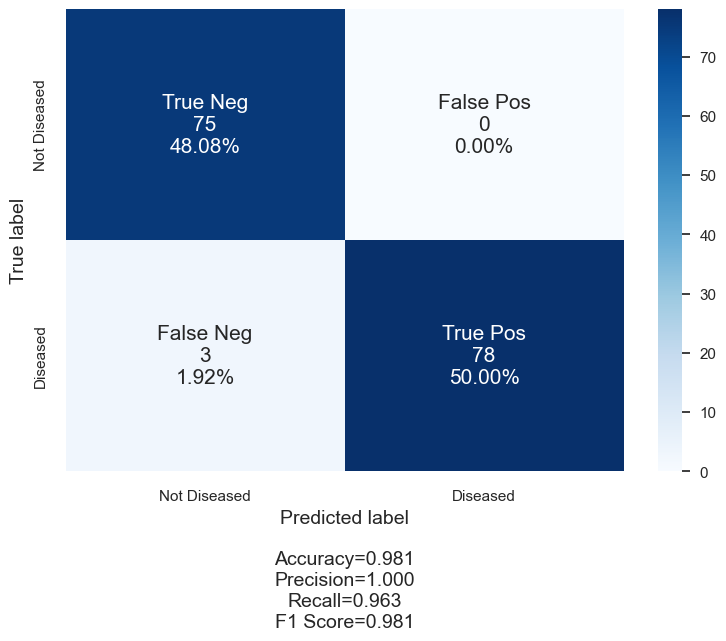

              precision    recall  f1-score   support

Not Diseased       0.96      1.00      0.98        75
    Diseased       1.00      0.96      0.98        81

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.981        0.02
1  PRECISION    1.0  1.000        0.00
2     RECALL    1.0  0.963        0.04
3   F1 SCORE    1.0  0.981        0.02
4        AUC    1.0  0.981        0.02

In [77]:
# Predicting target for X_train and X_test
y_pred = DTmodel.predict(X_test)
y_pred_train = DTmodel.predict(X_train)

# Getting model scores
value_train = round(DTmodel.score(X_train, y_train), 3)
value_test = round(DTmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Layout (only needs to be defined once)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not Diseased', 'Diseased']

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Random Forest

We can define the Random Forest Classifier as set of Decision Trees.



Grid search best parameters: {'criterion': 'entropy'} 

Grid search best parameters: RandomForestClassifier(criterion='entropy')

Grid search best parameters: {'bootstrap': True, 'max_depth': 10, 'oob_score': True, 'warm_start': True} 

Grid search best parameters: RandomForestClassifier(criterion='entropy', max_depth=10, oob_score=True,
                       warm_start=True)
                       
Grid search best parameters: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} 

Grid search best parameters: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, oob_score=True, warm_start=True)

qualidade = 0

for i in range(100): 
    # Creating RF Model #99 com ouliers colesterol sem 1800
    RFmodel = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 800,
                                 min_samples_split = 2,
                                 max_features = 'sqrt',
                                 bootstrap = True,
                                 oob_score = True,
                                 warm_start = True,
                                 class_weight = 'balanced_subsample',
                                 min_samples_leaf = 2,
                                 random_state = i
                                 ).fit(X_train, y_train)
    
    # Predicting target for X_train and X_test
    y_pred = RFmodel.predict(X_test)
    
    value_test = metrics.f1_score(y_test, y_pred)
    if value_test > 0.995:
        print('random state =', i, '\nScore =', value_test)
        qualidade += 1

# Random Forest classifier best parameters
n_estimators, min_samples_split ,min_samples_leaf, max_features, max_depth = best_parameters(RF_model,
                                                                                             param_grid_rf,
                                                                                             10)
# Random Forest classifier model
RF_model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf, max_features = max_features,
                            max_depth = max_depth, random_state = 0)
# fit the model
RF_model_tuned.fit(X_train, y_train)

# Insert Random Forest f1 scores in a list
f1_RF = ['Random Forest',round(metrics.f1_score(y_test, RF_model.predict(X_test),average='micro'),4),
                round(metrics.f1_score(y_test, RF_model_tuned.predict(X_test),average='micro'),4)]

In [100]:
# Creating RF Model full grid
RFmodel = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 20,
                                 bootstrap = True,
                                 oob_score = True,
                                 warm_start = True,
                                 max_features = 'auto',
                                 class_weight = 'balanced_subsample',
                                 min_samples_leaf = 2,
                                 min_samples_split = 2,
                                 random_state = seed
                                 )

RFmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=20, max_features='auto', min_samples_leaf=2,
                       oob_score=True, random_state=0, warm_start=True)

In [102]:
# Creating RF Model full grid
RFmodel = RandomForestClassifier(criterion = 'gini',
                                 max_depth = 20,
                                 bootstrap = True,
                                 oob_score = True,
                                 warm_start = True,
                                 max_features = 'auto',
                                 class_weight = 'balanced_subsample',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 random_state = seed
                                 
                                 )

RFmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='auto', oob_score=True, random_state=0,
                       warm_start=True)

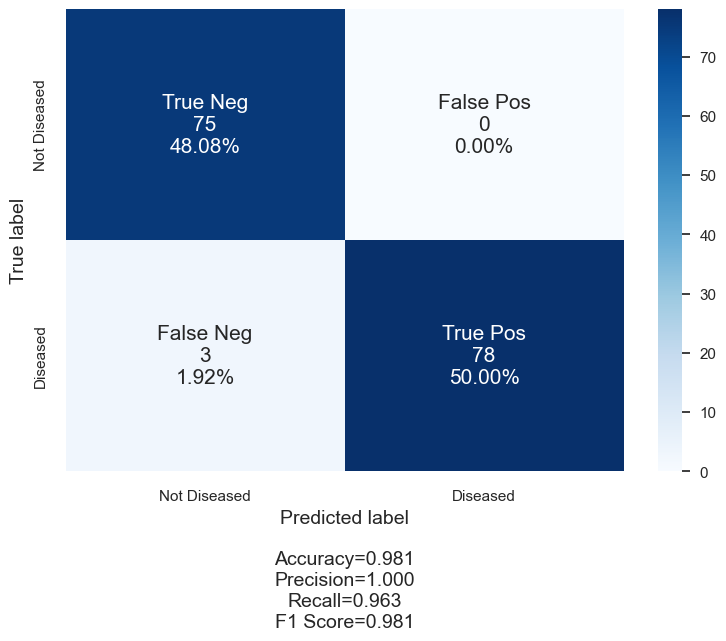

              precision    recall  f1-score   support

Not Diseased       0.96      1.00      0.98        75
    Diseased       1.00      0.96      0.98        81

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.981        0.02
1  PRECISION    1.0  1.000        0.00
2     RECALL    1.0  0.963        0.04
3   F1 SCORE    1.0  0.981        0.02
4        AUC    1.0  0.981        0.02

In [103]:
# Predicting target for X_train and X_test
y_pred = RFmodel.predict(X_test)
y_pred_train = RFmodel.predict(X_train)

# Getting model scores
value_train = round(RFmodel.score(X_train, y_train), 3)
value_test = round(RFmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### AdaBoost Classifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier that combines multiple classifiers to increase the accuracy of classifiers and can be used for both classification and regression problems.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

In [148]:
ADAmodel = AdaBoostClassifier(n_estimators = 150,
                              base_estimator = DTmodel,
                              algorithm = 'SAMME.R',
                              learning_rate = 100,
                              random_state = seed)

ADAmodel.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   learning_rate=100, n_estimators=150, random_state=0)

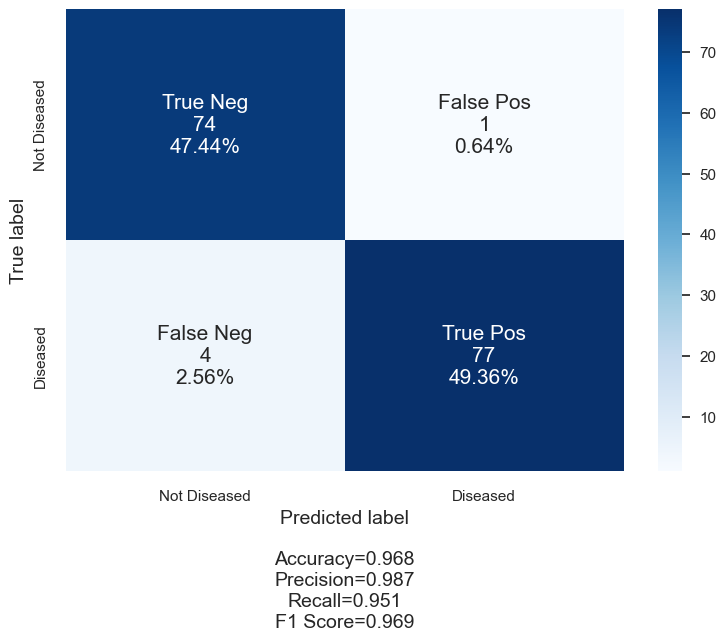

              precision    recall  f1-score   support

Not Diseased       0.95      0.99      0.97        75
    Diseased       0.99      0.95      0.97        81

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.968        0.03
1  PRECISION    1.0  0.987        0.01
2     RECALL    1.0  0.951        0.05
3   F1 SCORE    1.0  0.969        0.03
4        AUC    1.0  0.969        0.03

In [149]:
# Predicting target for X_train and X_test
y_pred = ADAmodel.predict(X_test)
y_pred_train = ADAmodel.predict(X_train)

# Getting model scores
value_train = round(ADAmodel.score(X_train, y_train), 3)
value_test = round(ADAmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.



Grid search best parameters: {'learning_rate': 1, 'max_features': 1, 'n_estimators': 200} 

Grid search best parameters: GradientBoostingClassifier(learning_rate=1, max_features=1, n_estimators=200)

In [150]:
# Creating GBC Model #99
GBCmodel = GradientBoostingClassifier(n_estimators = 200,
                                      warm_start = True,
                                      max_features = 5,
                                      learning_rate = 1,
                                      max_depth = 10, 
                                      min_samples_split = .1,
                                      min_samples_leaf = .01,
                                      tol = 1e-10,
                                      random_state = seed) 

GBCmodel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=10, max_features=5,
                           min_samples_leaf=0.01, min_samples_split=0.1,
                           n_estimators=200, random_state=0, tol=1e-10,
                           warm_start=True)

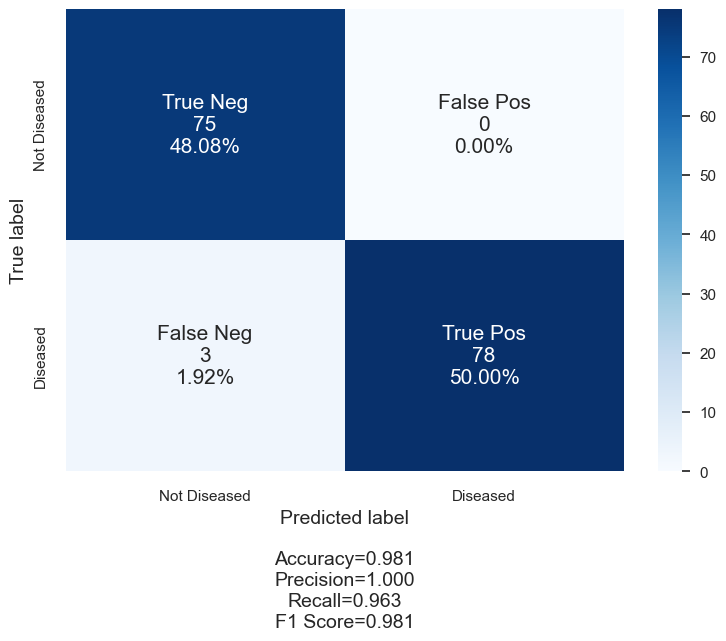

              precision    recall  f1-score   support

Not Diseased       0.96      1.00      0.98        75
    Diseased       1.00      0.96      0.98        81

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.981        0.02
1  PRECISION    1.0  1.000        0.00
2     RECALL    1.0  0.963        0.04
3   F1 SCORE    1.0  0.981        0.02
4        AUC    1.0  0.981        0.02

In [151]:
# Predicting target for X_train and X_test
y_pred = GBCmodel.predict(X_test)
y_pred_train = GBCmodel.predict(X_train)

# Getting model scores
value_train = round(GBCmodel.score(X_train, y_train), 3)
value_test = round(GBCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [161]:
# Creating XGB Model
#booster: Specify which booster to use: gbtree or dart gblinear
# tree_method: approx', 'auto', 'exact', 'gpu_hist', 'hist'
XGBmodel = XGBClassifier(n_estimators = 300,
                         booster = 'gbtree',
                         tree_method = 'hist',
                         max_depth = 500,
                         learning_rate = 1,
                         eta = .01,
                         gamma = 1e-10,
                         sampling_method = 'gradient_based',
                         random_state = seed) 

XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=1e-10, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=500,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

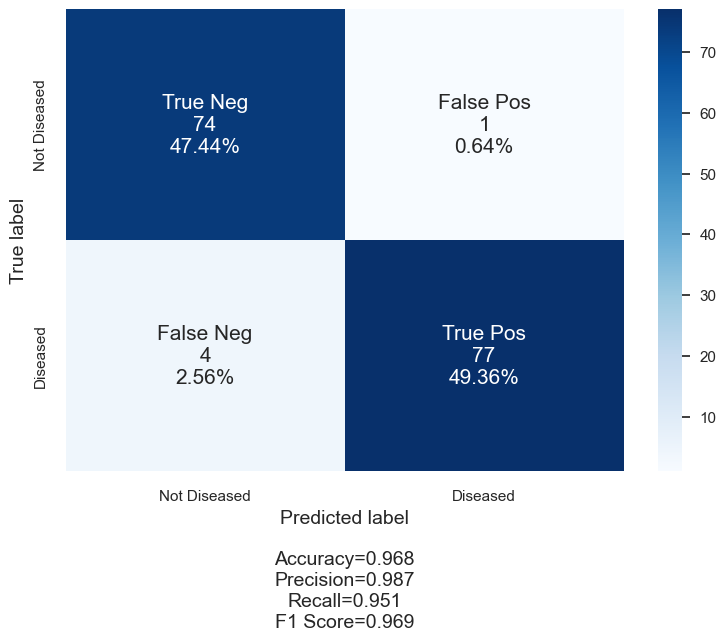

              precision    recall  f1-score   support

Not Diseased       0.95      0.99      0.97        75
    Diseased       0.99      0.95      0.97        81

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.968        0.03
1  PRECISION    1.0  0.987        0.01
2     RECALL    1.0  0.951        0.05
3   F1 SCORE    1.0  0.969        0.03
4        AUC    1.0  0.969        0.03

In [162]:
# Predicting target for X_train and X_test
y_pred = XGBmodel.predict(X_test)
y_pred_train = XGBmodel.predict(X_train)

# Getting model scores
value_train = round(XGBmodel.score(X_train, y_train), 3)
value_test = round(XGBmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Extremely Randomized Trees Classifier

Extremely Randomized Trees Classifier is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [163]:
ETCmodel = ExtraTreesClassifier(criterion = 'entropy',
                                max_depth = 50,
                                min_samples_split = 2,
                                max_features = 'auto',
                                bootstrap = True,
                                oob_score = True,
                                warm_start = True,
                                class_weight = 'balanced_subsample',
                                min_samples_leaf = 1,
                                random_state=seed).fit(X_train, y_train)

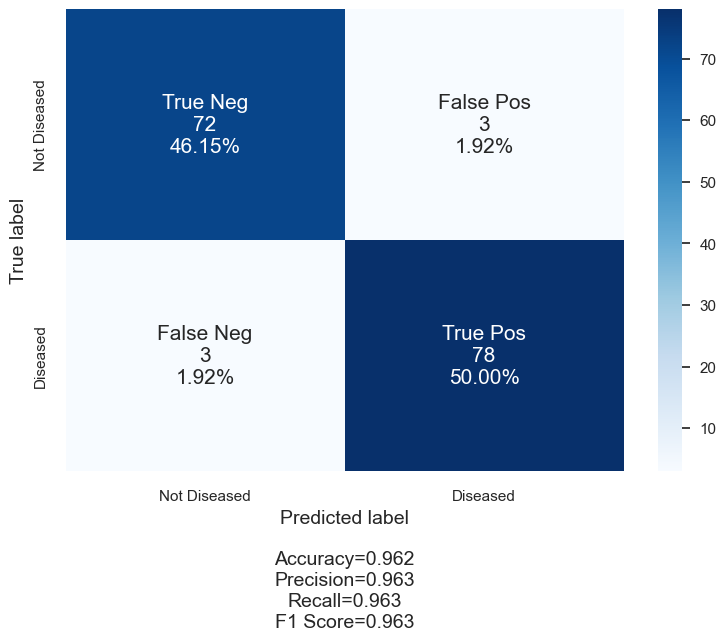

              precision    recall  f1-score   support

Not Diseased       0.96      0.96      0.96        75
    Diseased       0.96      0.96      0.96        81

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.962        0.04
1  PRECISION    1.0  0.963        0.04
2     RECALL    1.0  0.963        0.04
3   F1 SCORE    1.0  0.963        0.04
4        AUC    1.0  0.961        0.04

In [164]:
# Predicting target for X_train and X_test
y_pred = ETCmodel.predict(X_test)
y_pred_train = ETCmodel.predict(X_train)

# Getting model scores
value_train = round(ETCmodel.score(X_train, y_train), 3)
value_test = round(ETCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Logistic Regression

Logistic regression is a process of modelling the probability of a discrete outcome given an input variable. 

For the this model, only the most important features will be used


Grid search best parameters: {'C': 10.0, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'} 

Grid search best estimators: LogisticRegression(C=10.0, max_iter=10)

LogisticRegression(C=10, dual=True, fit_intercept=False, max_iter=200,
                   random_state=15, solver='liblinear')

In [165]:
# Creating LR Model
LRmodel = LogisticRegression(max_iter = 200,
                             solver = 'liblinear',
                             C = 10, 
                             penalty = 'l2',
                             dual = True,
                             fit_intercept = False,
                             multi_class = 'auto',
                             class_weight = None,
                             random_state = seed)

LRmodel.fit(X_train_scaled, y_train)

LogisticRegression(C=10, dual=True, fit_intercept=False, max_iter=200,
                   random_state=0, solver='liblinear')

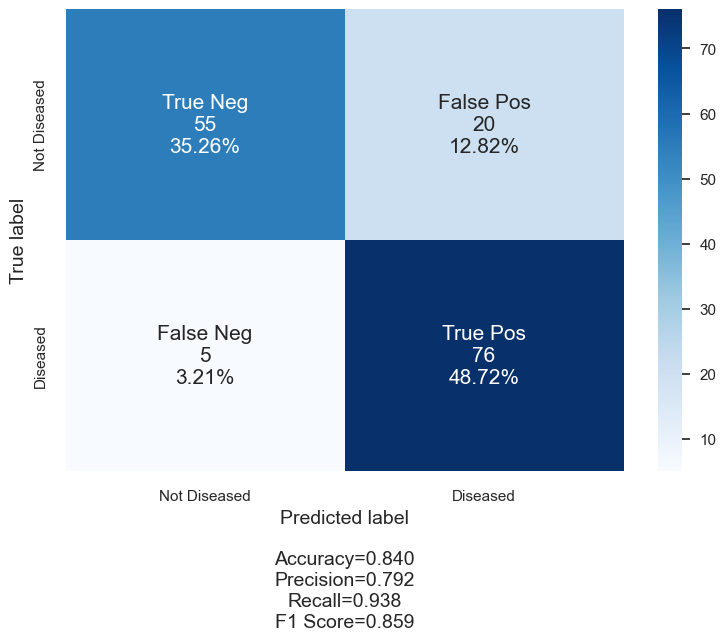

              precision    recall  f1-score   support

Not Diseased       0.92      0.73      0.81        75
    Diseased       0.79      0.94      0.86        81

    accuracy                           0.84       156
   macro avg       0.85      0.84      0.84       156
weighted avg       0.85      0.84      0.84       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY  0.877  0.840        0.04
1  PRECISION  0.844  0.792        0.05
2     RECALL  0.935  0.938       -0.00
3   F1 SCORE  0.887  0.859        0.03
4        AUC  0.874  0.836        0.04

In [166]:
# Predicting target for X_train_scaled and X_test_scaled
y_pred = LRmodel.predict(X_test_scaled)
y_pred_train = LRmodel.predict(X_train_scaled)

# Getting model scores
value_train = round(LRmodel.score(X_train_scaled, y_train), 3)
value_test = round(LRmodel.score(X_test_scaled, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [167]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(LRmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = LRmodel.predict(X_test)
y_pred_train = LRmodel.predict(X_train)

# Getting new scores
value_train = round(LRmodel.score(X_train, y_train), 3)
value_test = round(LRmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

NameError: name 'time' is not defined

> ### K-Nearest Neighbor

The K-Nearest neighbors algorithm, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.


Grid search best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} 

Grid search best parameters: KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [168]:
# Creating KN Model
KNmodel = KNeighborsClassifier(n_neighbors = 1,
                               leaf_size = 1,
                               p = 1,
                               weights = 'uniform',
                               algorithm = 'auto')

KNmodel.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

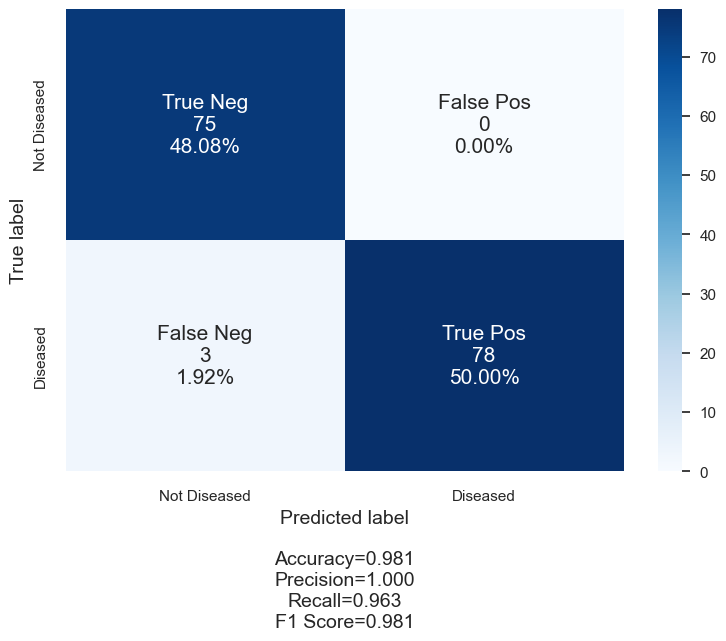

              precision    recall  f1-score   support

Not Diseased       0.96      1.00      0.98        75
    Diseased       1.00      0.96      0.98        81

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.981        0.02
1  PRECISION    1.0  1.000        0.00
2     RECALL    1.0  0.963        0.04
3   F1 SCORE    1.0  0.981        0.02
4        AUC    1.0  0.981        0.02

In [169]:
# Predicting target for X_train and X_test
y_pred = KNmodel.predict(X_test_scaled)
y_pred_train = KNmodel.predict(X_train_scaled)

# Getting model scores
value_train = round(KNmodel.score(X_train_scaled, y_train), 3)
value_test = round(KNmodel.score(X_test_scaled, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [170]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(KNmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = KNmodel.predict(X_test)
y_pred_train = KNmodel.predict(X_train)

# Getting new scores
value_train = round(KNmodel.score(X_train, y_train), 3)
value_test = round(KNmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

NameError: name 'time' is not defined

> ### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [171]:
bagging = BaggingClassifier(KNmodel,
                            n_estimators=5).fit(X_train_scaled, y_train)

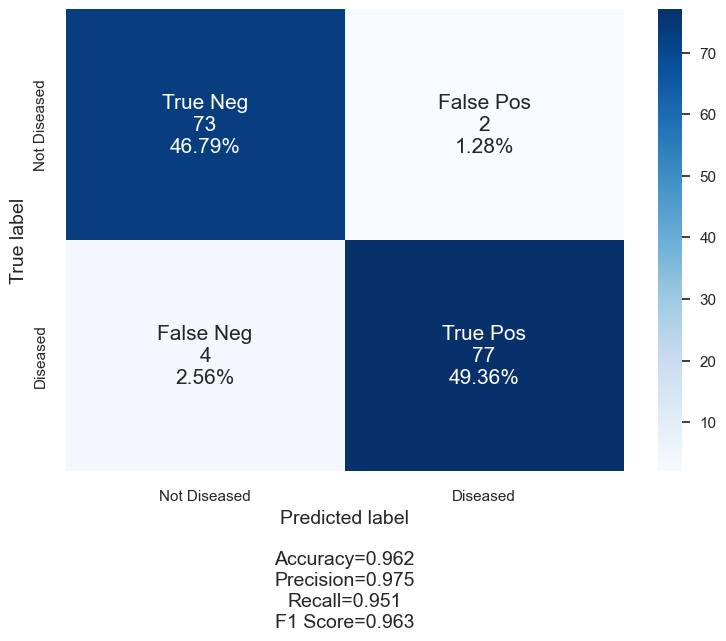

              precision    recall  f1-score   support

Not Diseased       0.95      0.97      0.96        75
    Diseased       0.97      0.95      0.96        81

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY  0.990  0.962        0.03
1  PRECISION  0.994  0.975        0.02
2     RECALL  0.988  0.951        0.04
3   F1 SCORE  0.991  0.962        0.03
4        AUC  0.990  0.962        0.03

In [172]:
# Predicting target for X_train and X_test
y_pred = bagging.predict(X_test_scaled)
y_pred_train = bagging.predict(X_train_scaled)

# Getting model scores
value_train = round(bagging.score(X_train_scaled, y_train), 3)
value_test = round(bagging.score(X_test_scaled, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Neural Network

A Neural Network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, Neural Networks refer to systems of neurons, either organic or artificial in nature.

In [173]:
# Creating NN Model
NNmodel = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 120, 
                        learning_rate = 'adaptive', 
                        learning_rate_init = .0505, 
                        solver = 'adam',
                        power_t = 1e-10,
                        max_iter = 500,
                        n_iter_no_change=1000,
                        random_state = seed)

NNmodel.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=120,
              learning_rate='adaptive', learning_rate_init=0.0505, max_iter=500,
              n_iter_no_change=1000, power_t=1e-10, random_state=0)

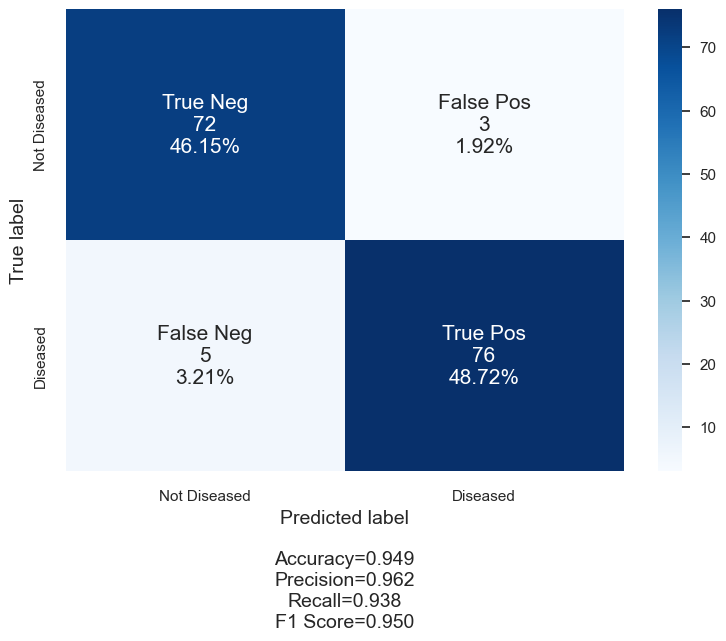

              precision    recall  f1-score   support

Not Diseased       0.94      0.96      0.95        75
    Diseased       0.96      0.94      0.95        81

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156



   Benchmarking Dataframe


Measure  Train   Test  Difference
0   ACCURACY    1.0  0.949        0.05
1  PRECISION    1.0  0.962        0.04
2     RECALL    1.0  0.938        0.06
3   F1 SCORE    1.0  0.950        0.05
4        AUC    1.0  0.949        0.05

In [174]:
# Predicting target for X_train and X_test
y_pred = NNmodel.predict(X_test_scaled)
y_pred_train = NNmodel.predict(X_train_scaled)

# Getting model scores
value_train = round(NNmodel.score(X_train_scaled, y_train), 3)
value_test = round(NNmodel.score(X_test_scaled, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

### Model Selection

### Deployment 

In [ ]:
RFmodel.predict(test_data)

In [ ]:
final_data = pd.DataFrame()
final_data['PatientID'] = test_data.reset_index()['PatientID']
final_data['Disease'] = RFmodel.predict(test_data)

final_data.to_csv(os.path.join(path, 'final.csv'))

### Conclusions